# Analisis de superficial del csv de clicks
### En este notebook exploramos los registros del csv con el objetivo de buscar relaciones entre las distintas variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Leemos el csv, y dropeamos las columnas action_id por estar llena de nans y wifi_connection por estar llena de False

In [2]:
clicks = pd.read_csv("data/clicks.csv", dtype={'advertiser_id': 'category', 'action_id': 'float64', 'source_id': 'category',
                                               'created': 'str', 'country_code':'category', 'latitude': 'float64',
                                               'longitude':'float64', 'wifi_connection':'bool' , 'carrier_id':np.float16,
                                               'trans_id':'str', 'os_minor':'float64', 'agent_device':'float64', 'os_major':'float64',
                                               'specs_brand':'int64', 'brand':'category', 'timeToClick':'float64',
                                               'touchX':'float64', 'touchY':'float64', 'ref_type':'category', 'ref_hash':'int64'}, parse_dates = ['created'])
clicks.drop('action_id', axis=1, inplace = True)
clicks.drop('wifi_connection', axis=1, inplace = True) #false
clicks['day'] = clicks['created'].dt.date
clicks['hour'] = clicks['created'].dt.hour
clicks.head(5)

advertiser_id source_id                 created         country_code  \
0             2         4 2019-03-06 22:42:12.755  6333597102633388268   
1             0         0 2019-03-08 10:24:30.641  6333597102633388268   
2             0         0 2019-03-08 15:24:16.069  6333597102633388268   
3             2         3 2019-03-06 03:08:51.543  6333597102633388268   
4             2         3 2019-03-06 03:32:55.570  6333597102633388268   

   latitude  longitude  carrier_id                         trans_id  \
0  1.205689   1.070234         1.0  iGgClCM9exiHF4K31g94XmvHEBSLKIY   
1  1.218924   1.071209         4.0  MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM   
2  1.205689   1.070234         6.0  vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU   
3  1.205689   1.070234        45.0  YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM   
4  1.205689   1.070234        45.0  X5XTOcYQovkl6yadYdAD7xioVGU9jiY   

       os_minor  agent_device      os_major          specs_brand brand  \
0  6.768137e+18           NaN  3.072849e+18  2733035977666442898   NaN   
1  3.025219e+18           NaN  1.774085e+18   392184377613098015   NaN   
2  5.975656e+18           NaN  3.072849e+18   392184377613098015   NaN   
3  6.768137e+18           NaN  3.072849e+18  2733035977666442898   NaN   
4  6.768137e+18           NaN  3.072849e+18  2733035977666442898   NaN   

   timeToClick  touchX  touchY             ref_type             ref_hash  \
0        1.563   0.905   0.078  1891515180541284343  1904083516767779093   
1          NaN     NaN     NaN  1891515180541284343  3086509764961796666   
2          NaN   0.946   0.473  1891515180541284343  6958163894863846647   
3       19.013   0.035   0.431  1891515180541284343  4368617728156436525   
4       28.110   0.054   0.423  1891515180541284343  4368617728156436525   

          day  hour  
0  2019-03-06    22  
1  2019-03-08    10  
2  2019-03-08    15  
3  2019-03-06     3  
4  2019-03-06     3

## Revisamos el tipo de cada columna

In [3]:
clicks.dtypes

advertiser_id          category
source_id              category
created          datetime64[ns]
country_code           category
latitude                float64
longitude               float64
carrier_id              float16
trans_id                 object
os_minor                float64
agent_device            float64
os_major                float64
specs_brand               int64
brand                  category
timeToClick             float64
touchX                  float64
touchY                  float64
ref_type               category
ref_hash                  int64
day                      object
hour                      int64
dtype: object

## Vemos una descripcion general de las columnas numericos

In [4]:
clicks.describe()

latitude     longitude    carrier_id      os_minor  agent_device  \
count  26351.000000  26351.000000  2.634000e+04  2.633900e+04  3.243000e+03   
mean       1.206906      1.070233           inf  4.635375e+18  4.171028e+18   
std        0.004484      0.001896  7.015625e+00  1.642969e+18  2.460496e+18   
min        1.205058      1.058204  0.000000e+00  6.666626e+17  4.513618e+16   
25%        1.205689      1.070234  3.000000e+00  3.378640e+18  1.975183e+18   
50%        1.205689      1.070234  6.000000e+00  3.511538e+18  3.516812e+18   
75%        1.205689      1.070234  1.300000e+01  6.391567e+18  6.589622e+18   
max        1.237861      1.085358  1.160000e+02  9.081082e+18  9.221733e+18   

           os_major   specs_brand   timeToClick        touchX        touchY  \
count  2.633900e+04  2.635100e+04  22977.000000  23011.000000  23011.000000   
mean   3.913451e+18  1.299055e+18    230.403309      0.638784      1.478656   
std    1.885866e+18  1.149672e+18    976.849149      0.301983      2.622727   
min    7.436481e+17  3.921844e+17      0.017000      0.000000      0.000000   
25%    1.774085e+18  3.921844e+17      2.915000      0.426000      0.183000   
50%    3.072849e+18  3.921844e+17     10.588000      0.726000      0.645000   
75%    4.566454e+18  2.733036e+18     71.703000      0.901000      0.991000   
max    7.499732e+18  8.930605e+18  17616.188000      1.000000     16.600000   

           ref_hash          hour  
count  2.635100e+04  26351.000000  
mean   4.611581e+18     10.423437  
std    2.673175e+18      7.771639  
min    9.286192e+14      0.000000  
25%    2.273798e+18      2.000000  
50%    4.623721e+18     10.000000  
75%    6.917850e+18     17.000000  
max    9.221118e+18     23.000000

## Revisamos la correlacion entre las variables

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


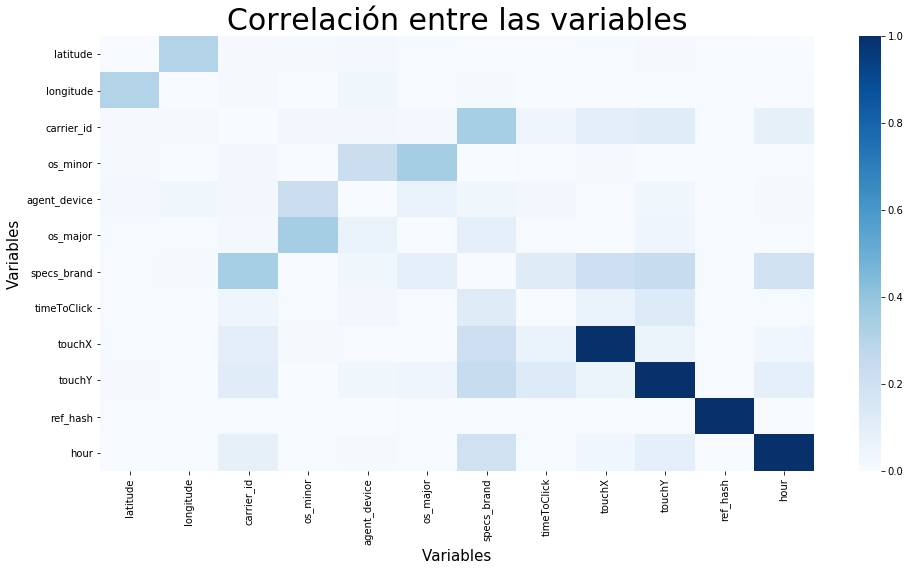

In [5]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = clicks.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Correlación entre las variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)

## Buscamos la distribucion de las coordenadas, se puede ver que los registros provienen de Uruguay

Text(0.5, 1.0, 'Distribucion de las coordenadas geograficas')

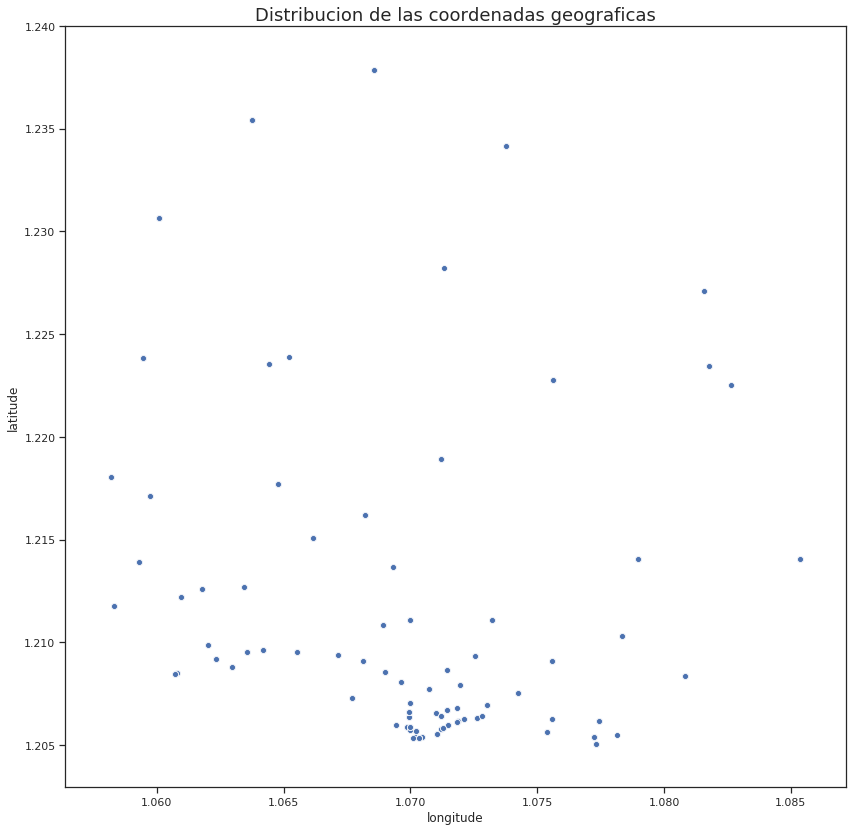

In [6]:
sns.set(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(14,14))
plot = sns.scatterplot(x = clicks["longitude"], y = clicks["latitude"]);
plot.set_title("Distribucion de las coordenadas geograficas", fontsize=18)

## Buscamos la posición de los clicks en la pantalla

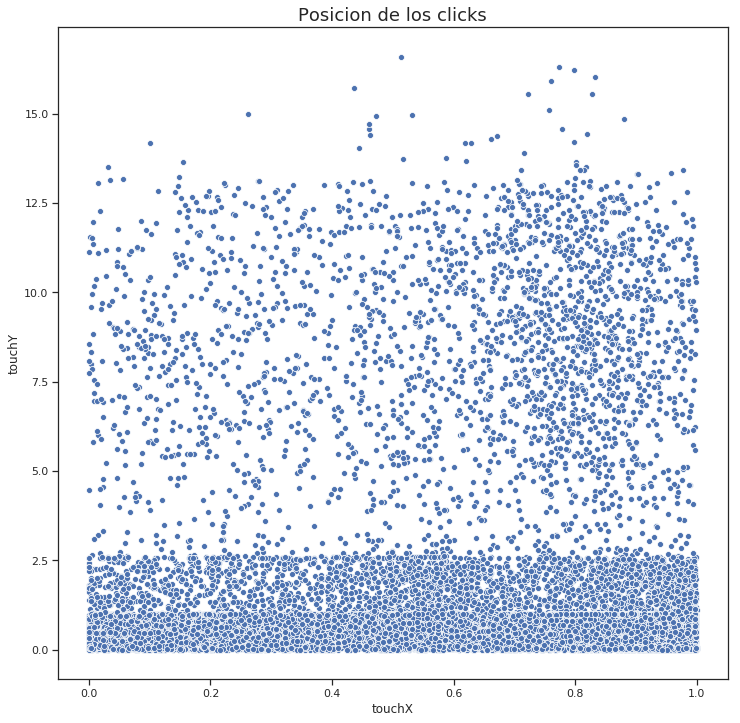

In [7]:
clicks_acotado= clicks.loc[clicks['timeToClick'] != np.NaN].copy()
sns.set(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(12,12))
plot = sns.scatterplot(x = clicks["touchX"], y = clicks["touchY"]);
plot.set_title("Posicion de los clicks", fontsize=18)
plt.savefig('posicion_clicks.png', bbox_inches = 'tight')

## Ya que el grafico anterior no mostraba bien la cantidad de clicks en las partes mas densas realizamos un grafico de densidad

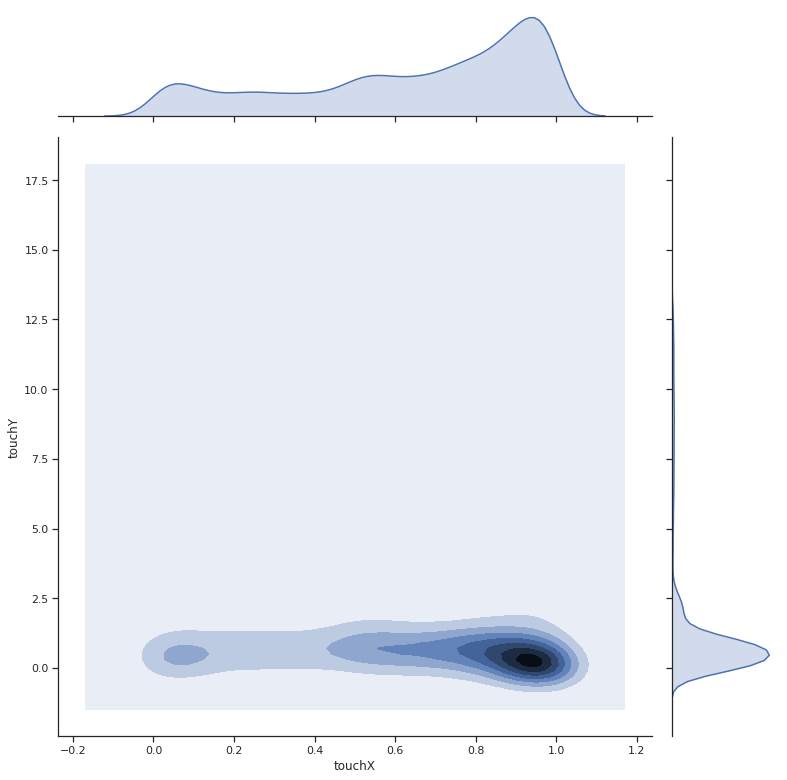

In [8]:
sns.jointplot(x="touchX", y="touchY", data=clicks_acotado, kind="kde", height = 11);
ax.tick_params(labelsize=10)
plt.savefig('posicion_clicks_kde.png', bbox_inches = 'tight')

## Volvemos a realizar el scatterplot pero utilizando el timeToClick como tamaño del punto

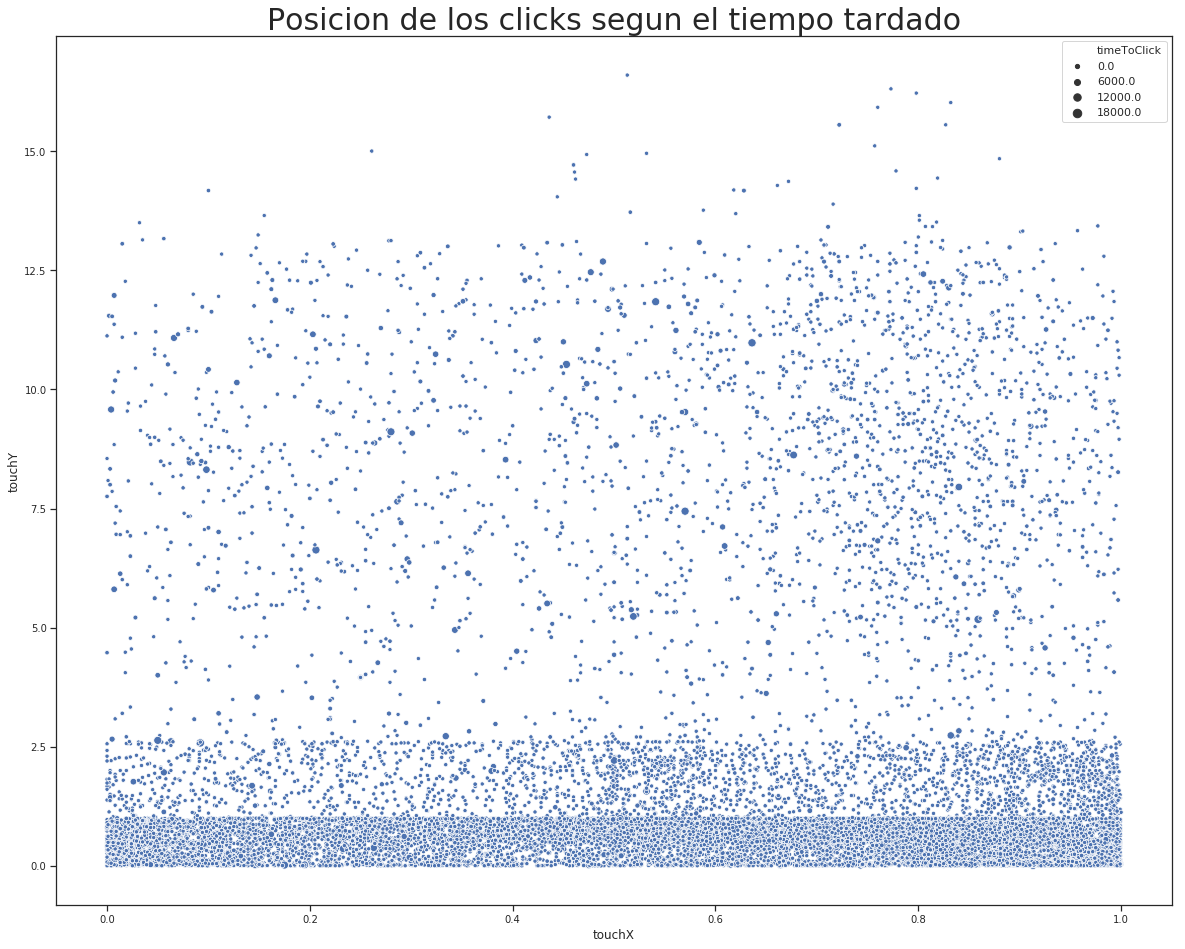

In [9]:
fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.scatterplot(x = clicks_acotado["touchX"], y= clicks_acotado["touchY"], size=clicks_acotado['timeToClick']);
ax.axes.set_title("Posicion de los clicks segun el tiempo tardado",fontsize=30)
ax.tick_params(labelsize=10)

## Ahora con el source_id

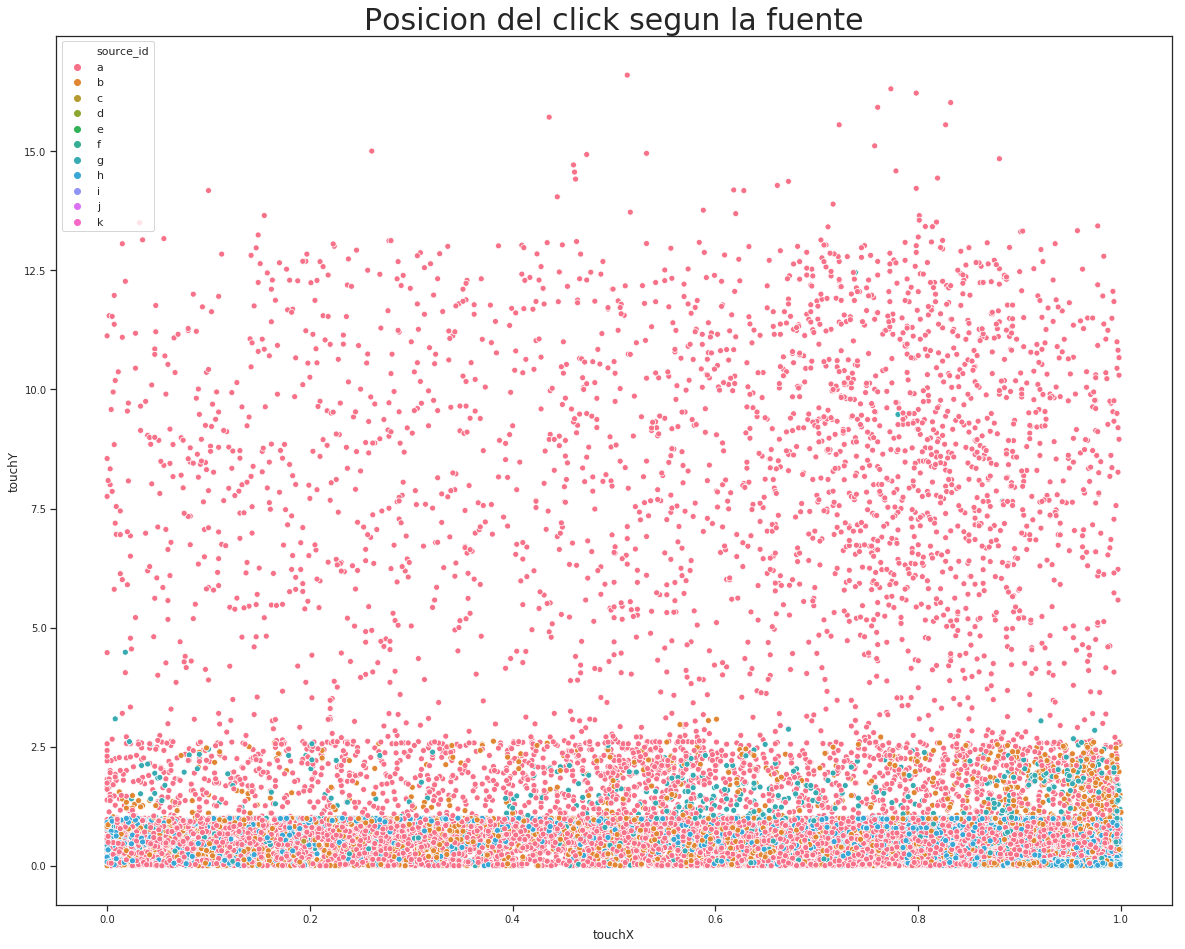

In [10]:
clicks_acotado['source_id'].cat.categories = ['a','b','c','d','e','f','g', 'h', 'i', 'j', 'k']

fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
sns.scatterplot(x = clicks_acotado["touchX"], y= clicks_acotado["touchY"], hue = clicks_acotado['source_id']);
ax.axes.set_title("Posicion del click segun la fuente",fontsize=30)
ax.tick_params(labelsize=10)

## Realizamos un histograma del TimeToClick

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Cantidad')

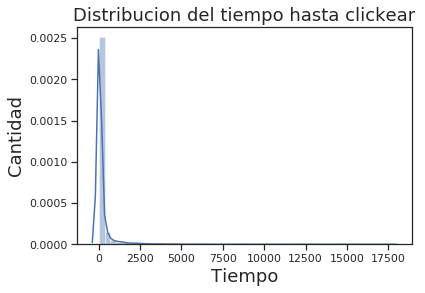

In [11]:
clicks_acotado = clicks.dropna(subset= ['timeToClick'])

plot = sns.distplot(clicks_acotado['timeToClick'])
plot.set_title("Distribucion del tiempo hasta clickear", fontsize=18)
plot.set_xlabel("Tiempo",fontsize=18)
plot.set_ylabel("Cantidad", fontsize=18)

## Lo mostramos en escala logaritmica para ver mas detalle

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Cantidad')

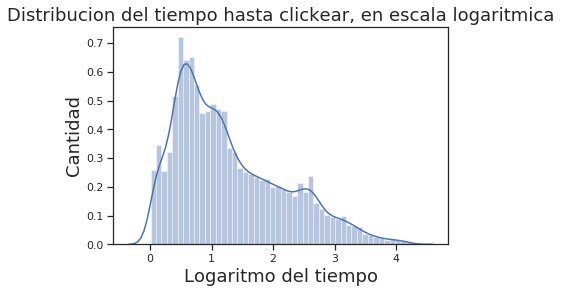

In [12]:
plot = sns.distplot(np.log10(clicks['timeToClick'] +1).dropna())
plot.set_title("Distribucion del tiempo hasta clickear, en escala logaritmica", fontsize=18)
plot.set_xlabel("Logaritmo del tiempo",fontsize=18)
plot.set_ylabel("Cantidad", fontsize=18)

## Creamos una columna categorica del TimeToClick

In [13]:
bins = pd.IntervalIndex.from_tuples([(600, 120000), (180, 600), (60, 180), (15, 60), (3, 15), (0, 3)])
clicks_acotado['time_categ'] = pd.cut(clicks_acotado['timeToClick'],bins)
clicks_acotado['time_categ'].cat.categories = ['10 a 2000min','3 a 10min','1 a 3 min','15 a 60seg','3 a 15seg','0 a 3 seg']

clicks['time_categ'] = pd.cut(clicks['timeToClick'],bins)
clicks['time_categ'].cat.categories = ['10 a 2000min','3 a 10min','1 a 3 min','15 a 60seg', '3 a 15seg','0 a 3 seg']

clicks_acotado['time_categ'].value_counts()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3 a 15seg       7151
0 a 3 seg       5880
15 a 60seg      3800
1 a 3 min       2270
3 a 10min       2202
10 a 2000min    1674
Name: time_categ, dtype: int64

## Vemos la distribucion de esta columna

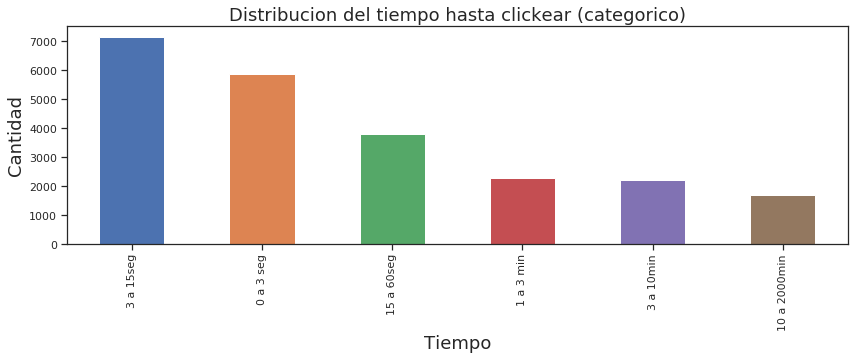

In [14]:
plot = clicks_acotado['time_categ'].value_counts().plot(kind='bar',figsize=(14,4));
plot.set_title("Distribucion del tiempo hasta clickear (categorico)", fontsize=18)
plot.set_xlabel("Tiempo",fontsize=18)
plot.set_ylabel("Cantidad", fontsize=18)
plt.savefig('time_categ.png', bbox_inches = 'tight')

## Buscamos la actividad de cada advertiser a lo largo de los dias

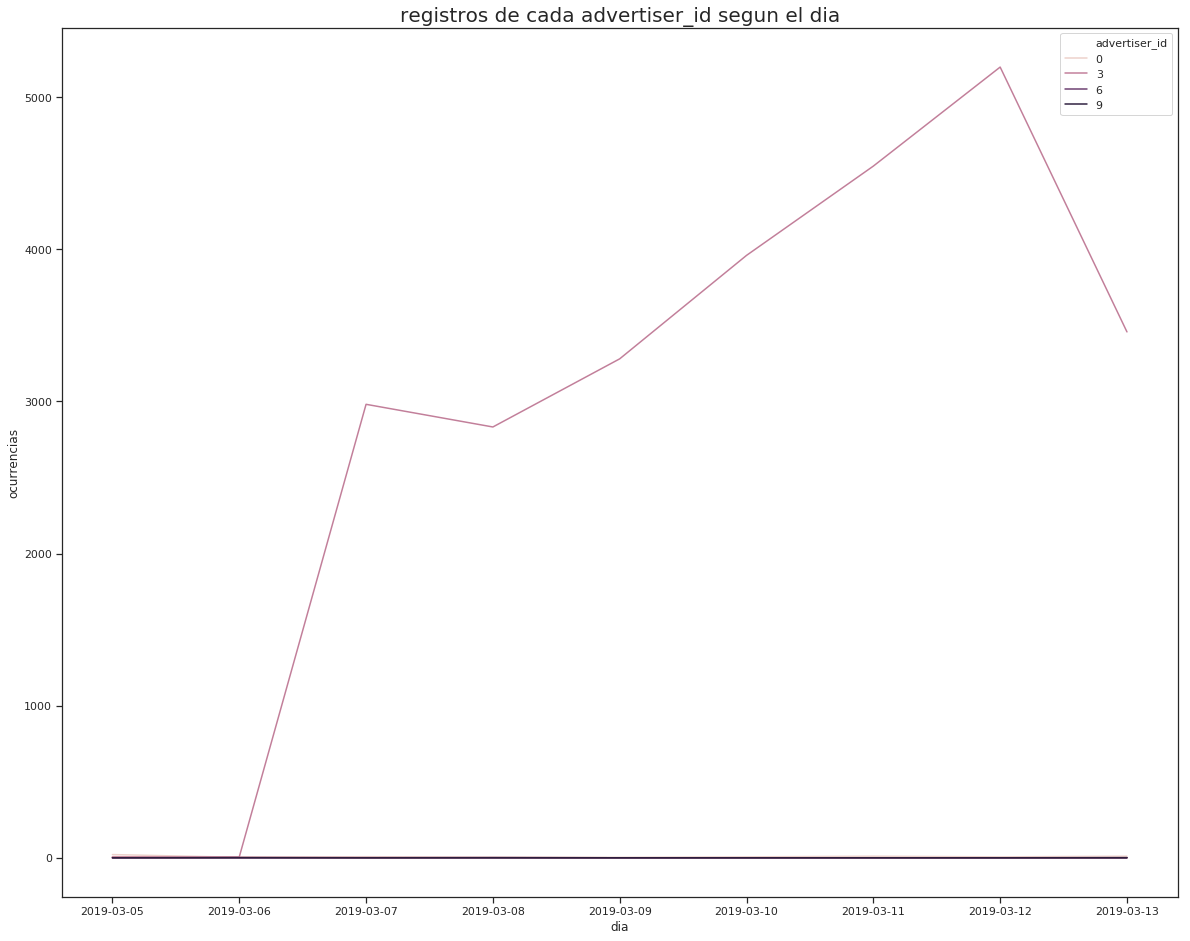

In [15]:
clicks['dia']=clicks['created'].dt.date
clicks['ocurrencias']=1
fig, ax = plt.subplots(figsize=(20,16))
ax.axes.set_title("registros de cada advertiser_id segun el dia",fontsize=20)
tabla=clicks[['dia','ocurrencias','advertiser_id']].groupby(['dia','advertiser_id']).count()
tabla = tabla.reset_index()
tabla['ocurrencias']=tabla['ocurrencias'].fillna(0)

tabla["advertiser_id"] = pd.to_numeric(tabla["advertiser_id"])
sns.lineplot(x="dia",y="ocurrencias", data= tabla ,ax=ax, hue="advertiser_id",markers=True)
pd.to_numeric(tabla.advertiser_id);

## Ahora sin la maxima

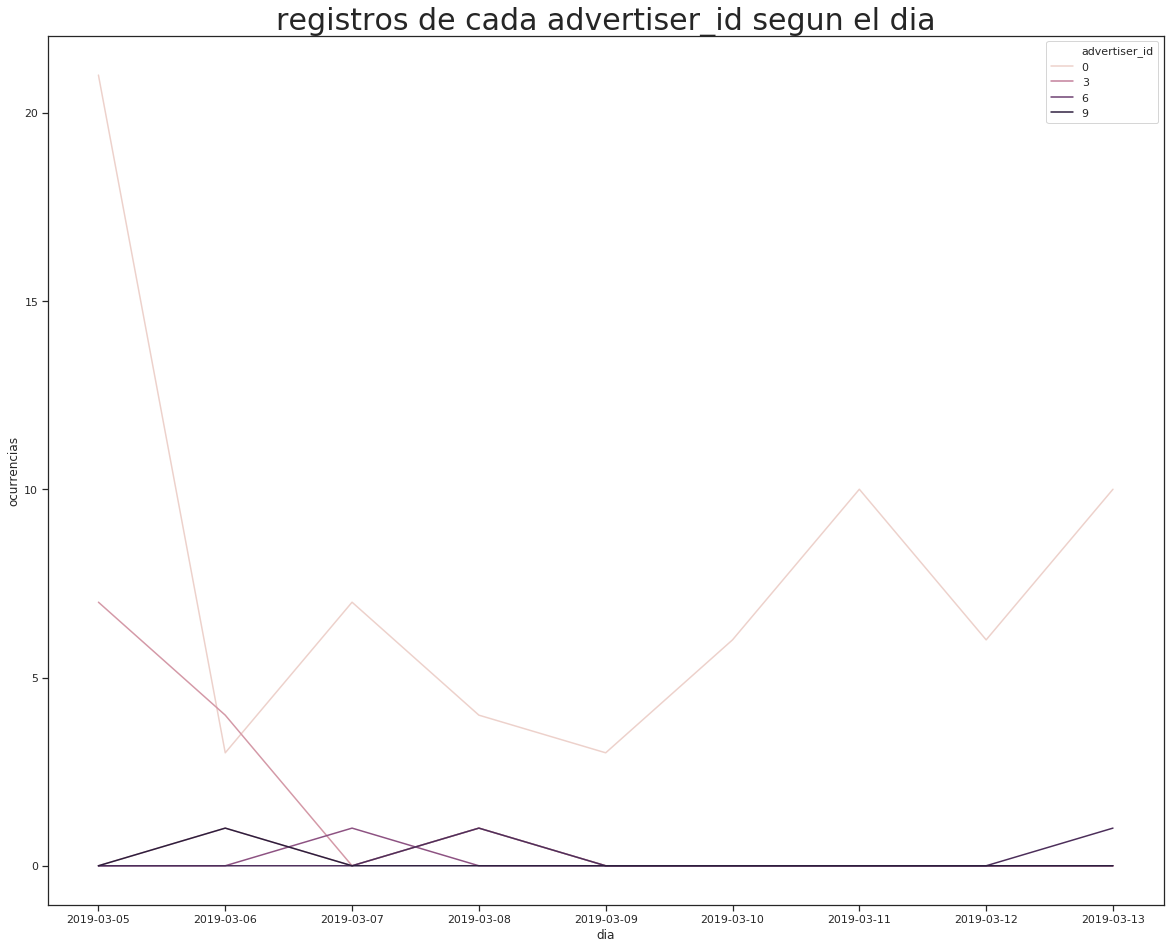

In [16]:
fig, ax = plt.subplots(figsize=(20,16))
ax.axes.set_title("registros de cada advertiser_id segun el dia",fontsize=30)
tabla=clicks[['dia','ocurrencias','advertiser_id']].groupby(['dia','advertiser_id']).count()
tabla = tabla.reset_index()
tabla['ocurrencias']=tabla['ocurrencias'].fillna(0)

tabla["advertiser_id"] = pd.to_numeric(tabla["advertiser_id"])
sns.lineplot(x="dia",y="ocurrencias", data= tabla.loc[tabla.advertiser_id !=3] ,ax=ax, hue="advertiser_id",markers=True)
pd.to_numeric(tabla.advertiser_id);

## Vemos el value_counts de cada columna para buscar las que tengan menor entropia

In [17]:
for i in clicks.columns: 
    print('Columna: ' + str(i))
    print(clicks[str(i)].value_counts())
    print('\n')

Columna: advertiser_id
3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64


Columna: source_id
0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64


Columna: created
2019-03-10 05:02:10.703    2
2019-03-07 23:24:46.085    2
2019-03-10 01:37:34.402    2
2019-03-07 23:16:30.731    2
2019-03-09 05:15:41.059    1
2019-03-07 23:35:05.272    1
2019-03-11 11:32:59.224    1
2019-03-13 22:01:46.101    1
2019-03-11 09:24:24.160    1
2019-03-08 09:47:25.959    1
2019-03-09 12:12:44.808    1
2019-03-11 01:10:15.662    1
2019-03-13 01:07:48.804    1
2019-03-12 04:12:50.231    1
2019-03-13 00:50:18.806    1
2019-03-09 12:11:33.128    1
2019-03-07 23:26:18.851    1
2019-03-10 10:50:46.044    1
2019-03-12 02:14:55.330    1
2019-03-08 01:35:07.149    1
2019-03-07 23:45:33.297    1
2019-03-11 11:27:11.349    1
2019-03-12 13:34:09.896   

## Elegimos las columnas con menor entropia o pocos valores diferentes y nos quedamos con los 5 valores mas comunes

In [18]:
grupos = ['advertiser_id', 'carrier_id', 'os_minor', 'agent_device', 'os_major', 'specs_brand', 'ref_type', 'hour', 'day', 'time_categ']
top5 = {}
for i in grupos:
    top5[i]= clicks[i].value_counts().head(5).index.tolist()
top5

{'advertiser_id': ['3', '0', '2', '7', '1'],
 'agent_device': [3.516811792181616e+18,
  1.7545278564638182e+18,
  6.88241452041436e+18,
  7.787530752469096e+18,
  4.2817293286141727e+18],
 'carrier_id': [4.0, 6.0, 1.0, 13.0, 3.0],
 'day': [datetime.date(2019, 3, 12),
  datetime.date(2019, 3, 11),
  datetime.date(2019, 3, 10),
  datetime.date(2019, 3, 13),
  datetime.date(2019, 3, 9)],
 'hour': [1, 23, 2, 11, 22],
 'os_major': [3.072849339937028e+18,
  4.5664539119756943e+18,
  1.77408510258909e+18,
  7.452405704979208e+18,
  5.745805136738488e+18],
 'os_minor': [3.3786399484966047e+18,
  6.768137412412545e+18,
  5.97565607170903e+18,
  3.5115378169499003e+18,
  6.391567095202501e+18],
 'ref_type': ['1891515180541284343',
  '1494519392962156891',
  '5016171802147987303',
  '6323871695571587575'],
 'specs_brand': [392184377613098015,
  2733035977666442898,
  8930605132947907029,
  3855167788531275156,
  5675295985273558497],
 'time_categ': ['3 a 15seg',
  '0 a 3 seg',
  '15 a 60seg',
  '

## Realizamos la distribucion general de estas columnas para esos valores

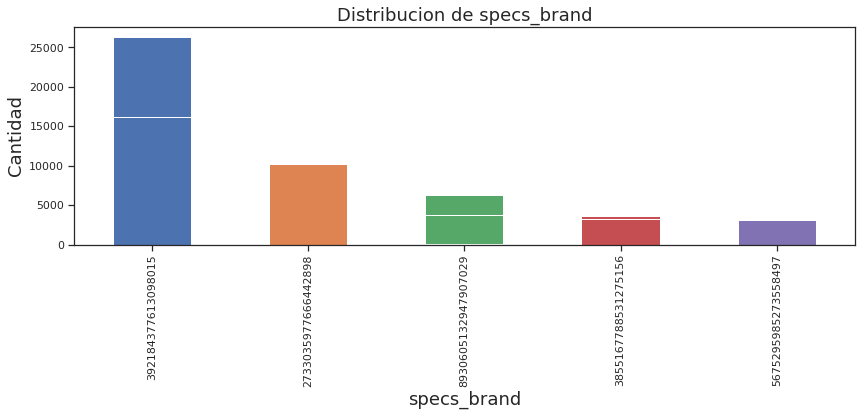

In [19]:
def barplot_simple(i):
    clicks_filtrado = clicks.loc[clicks[i].isin(top5[i])][i]
    if clicks_filtrado.empty:
        print('no pude hacer barplot de' + i)
        return
    plot = clicks_filtrado.value_counts().plot(kind='bar',figsize=(14,4));
    plot.set_title('Distribucion de ' + i, fontsize=18)
    plot.set_xlabel(i,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('clicks/top5'+str(i)+'.png', bbox_inches = 'tight')

for i in top5.keys():
    barplot_simple(i)

## Realizamos la distribucion de cada columna con respecto a las otras

/home/gonzalo/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


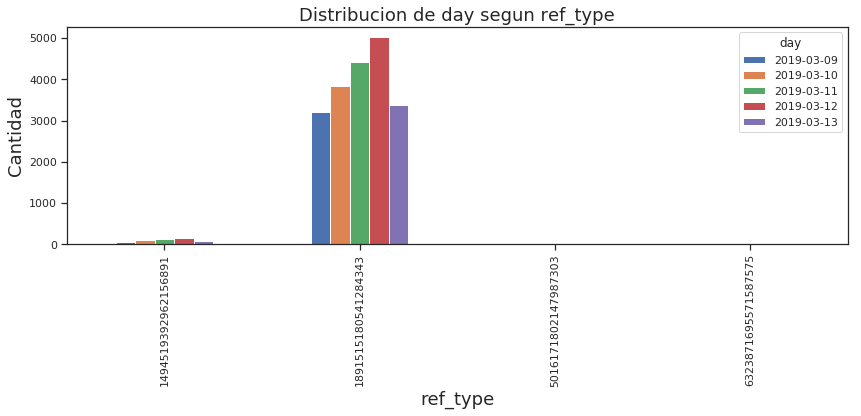

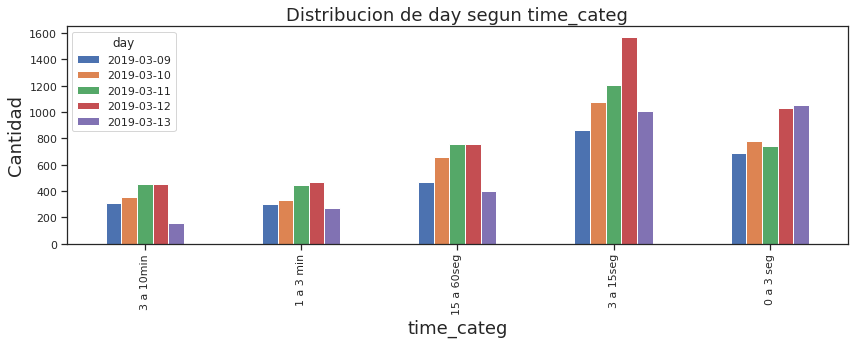

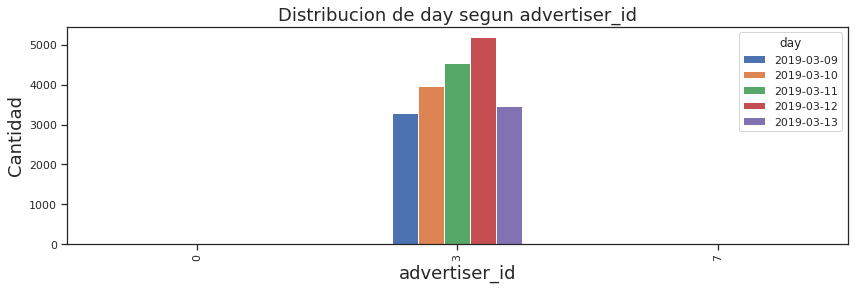

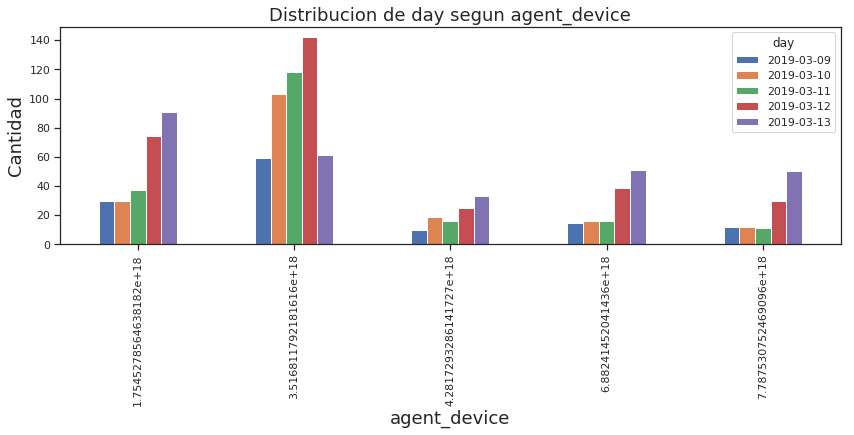

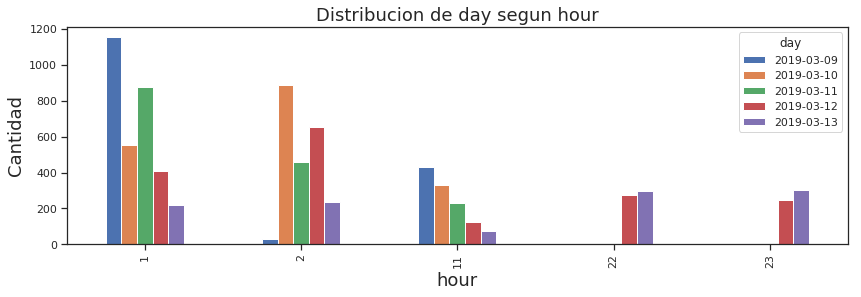

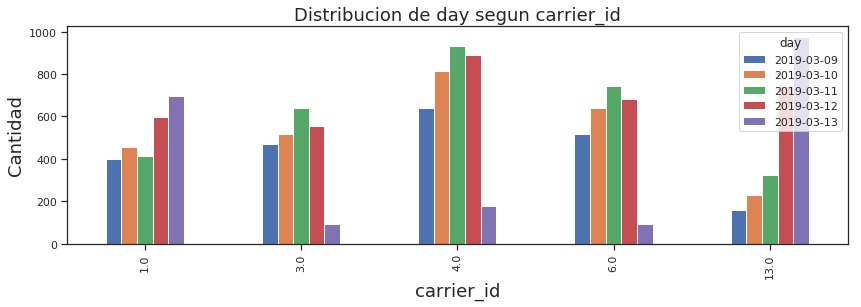

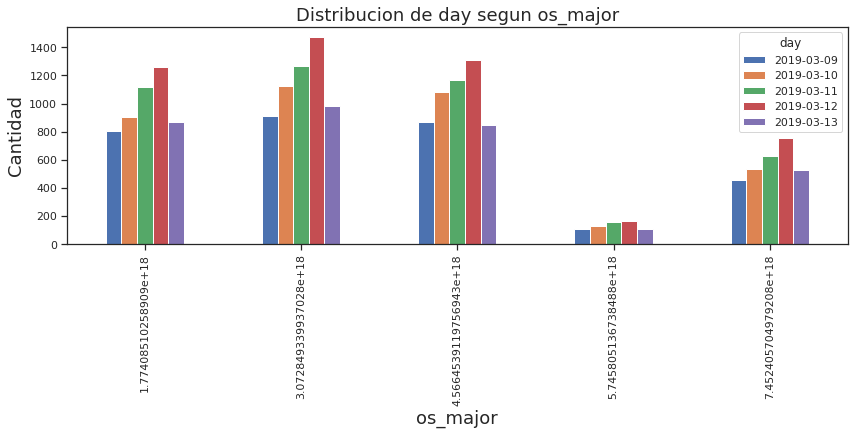

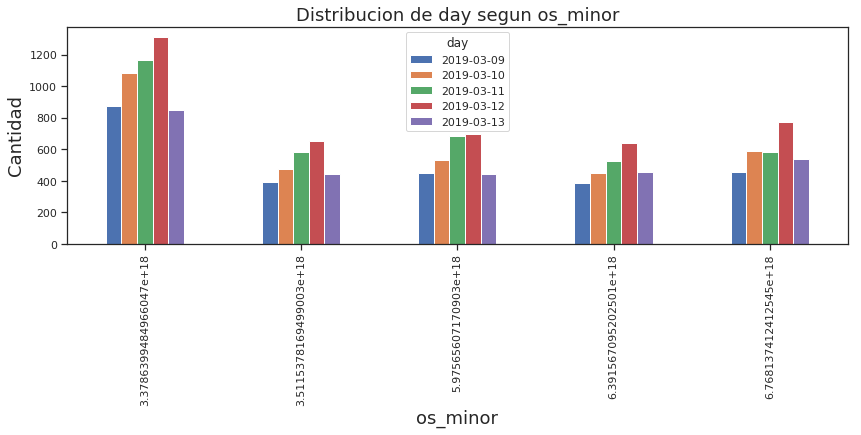

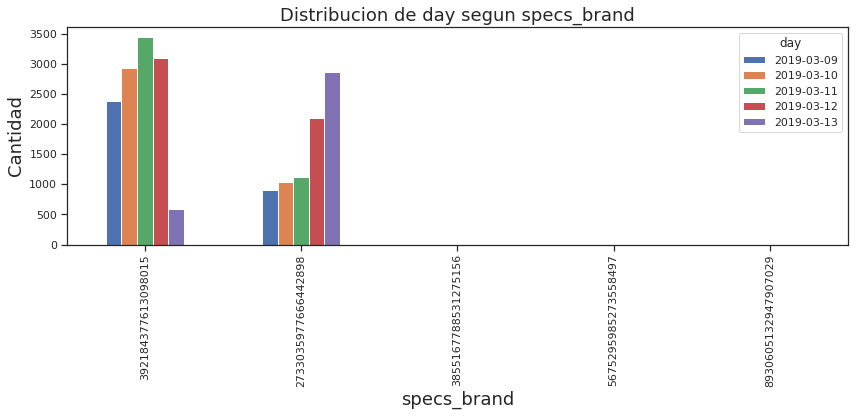

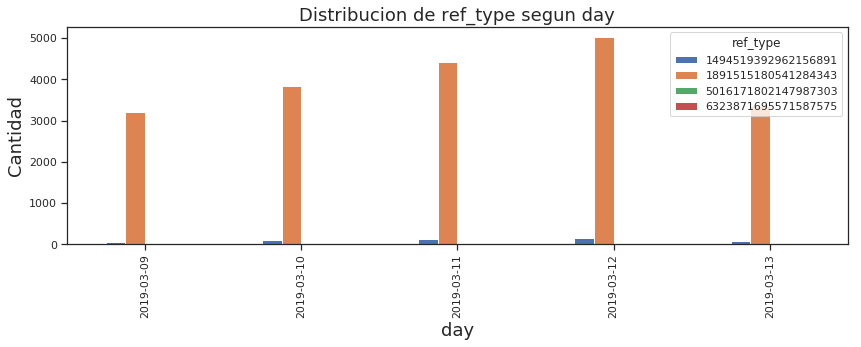

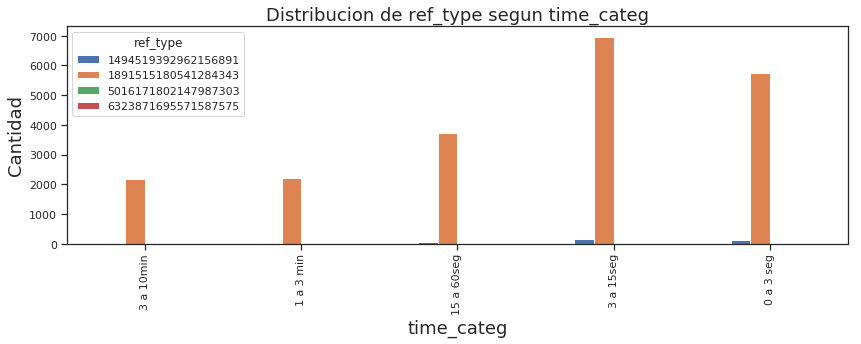

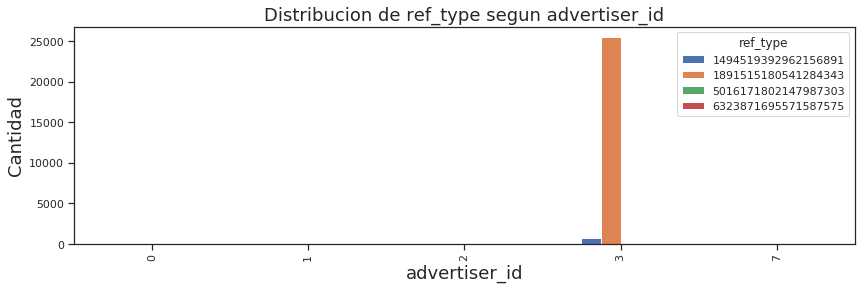

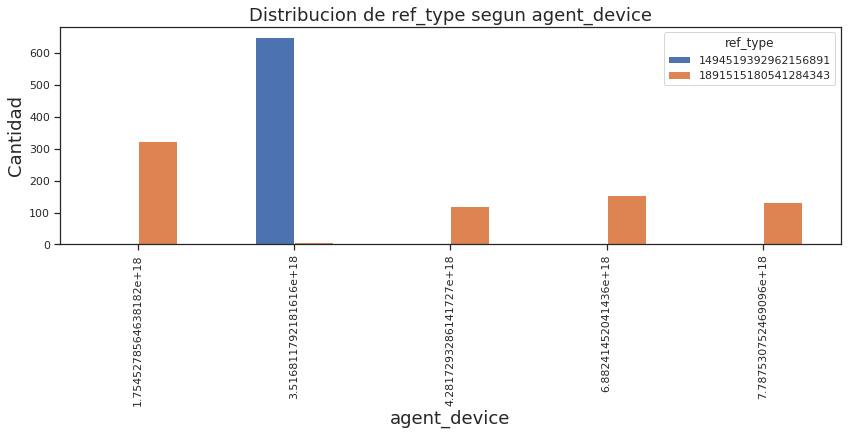

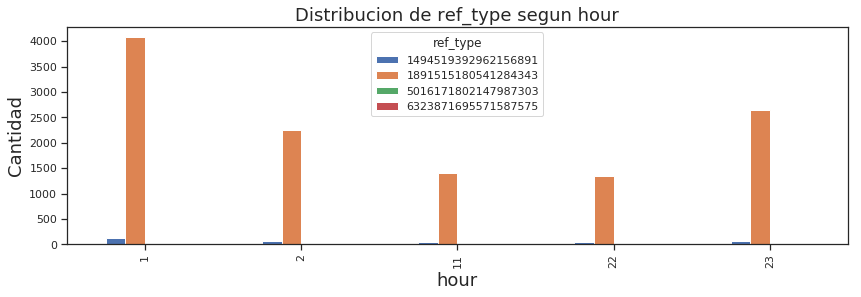

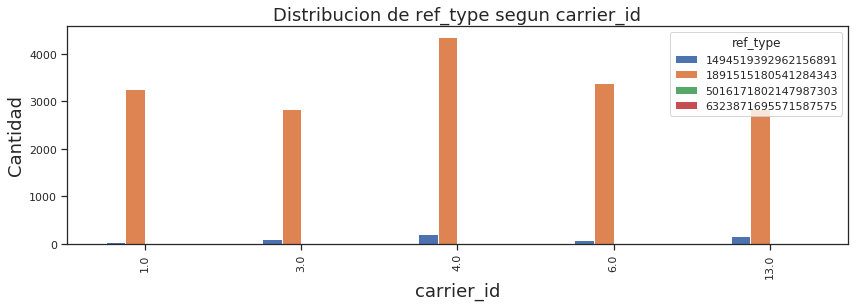

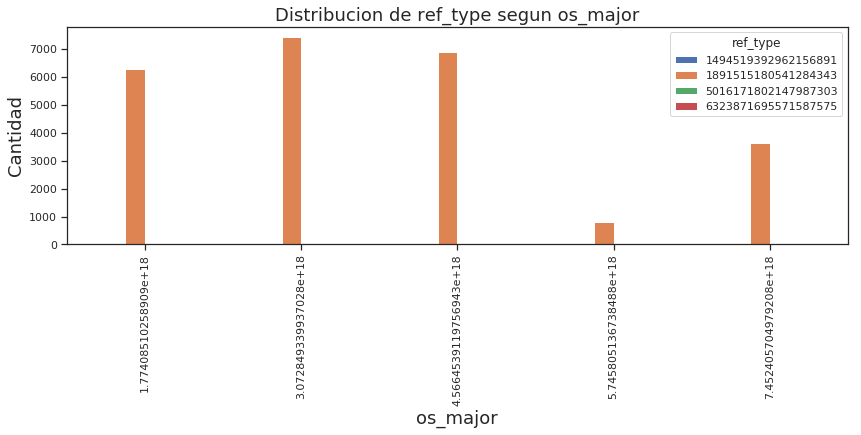

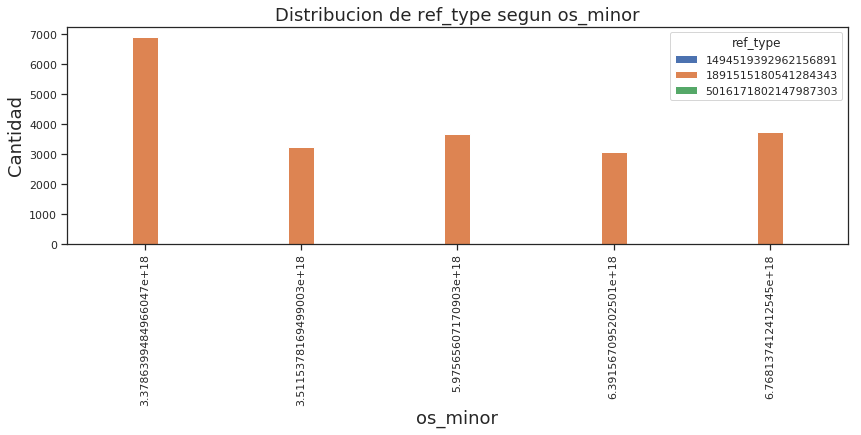

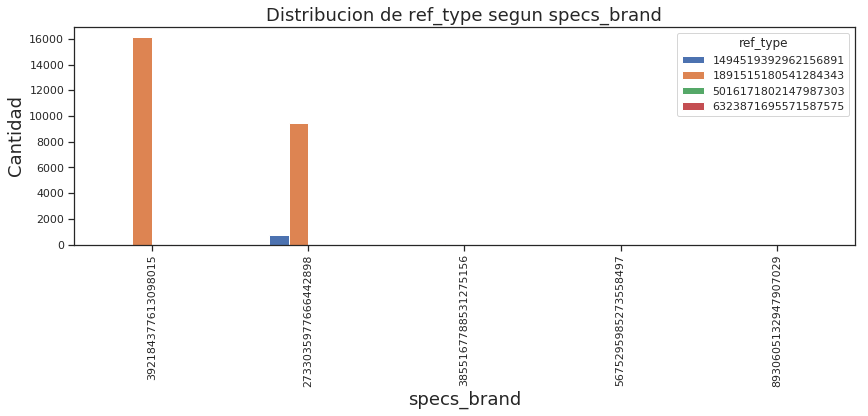

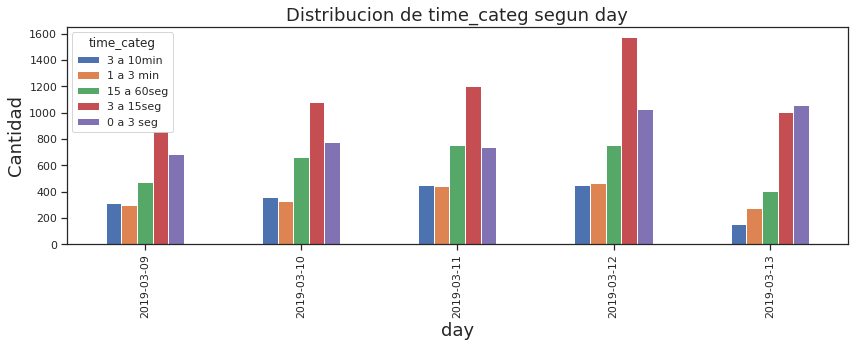

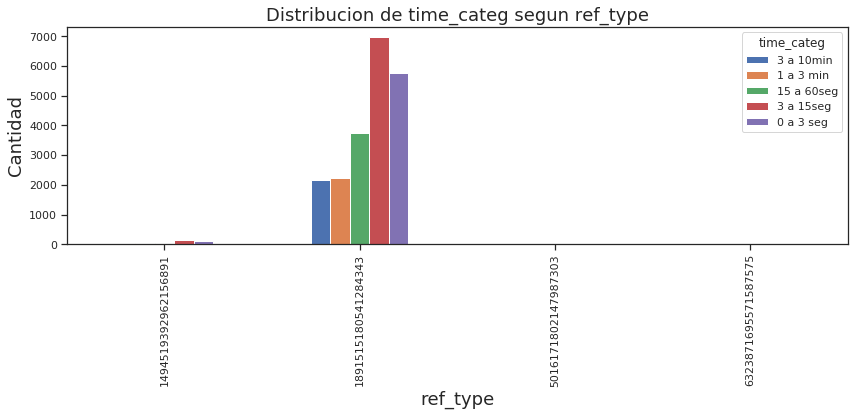

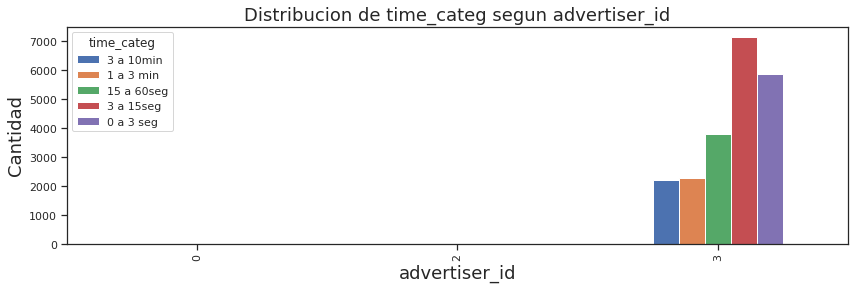

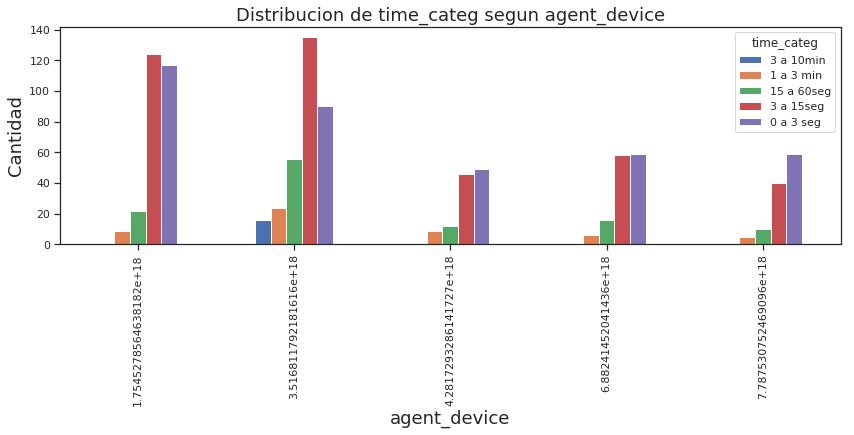

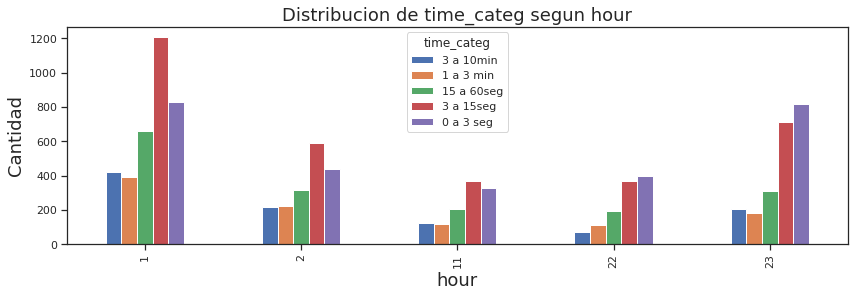

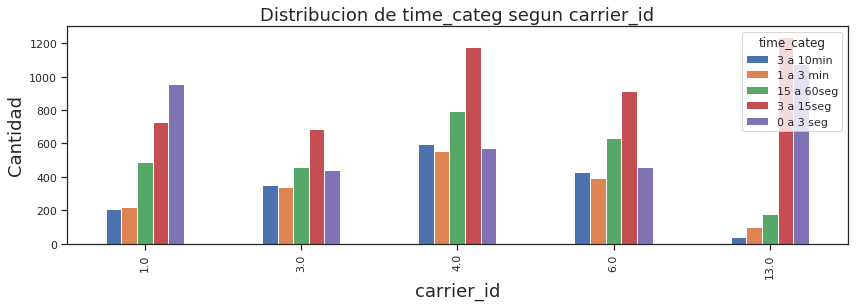

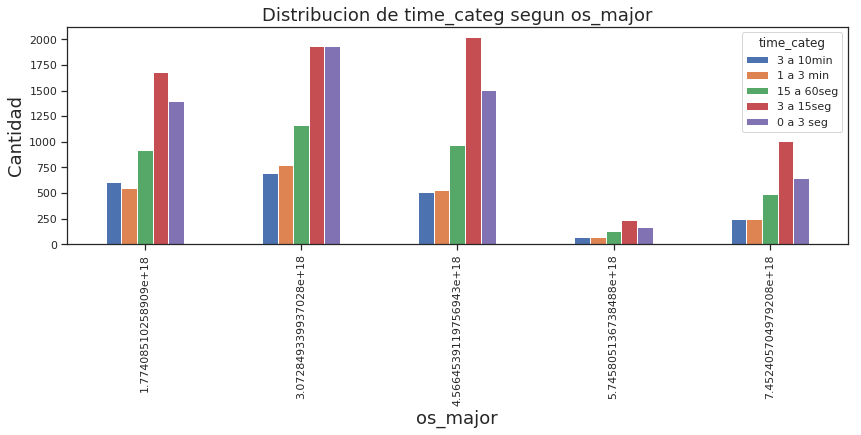

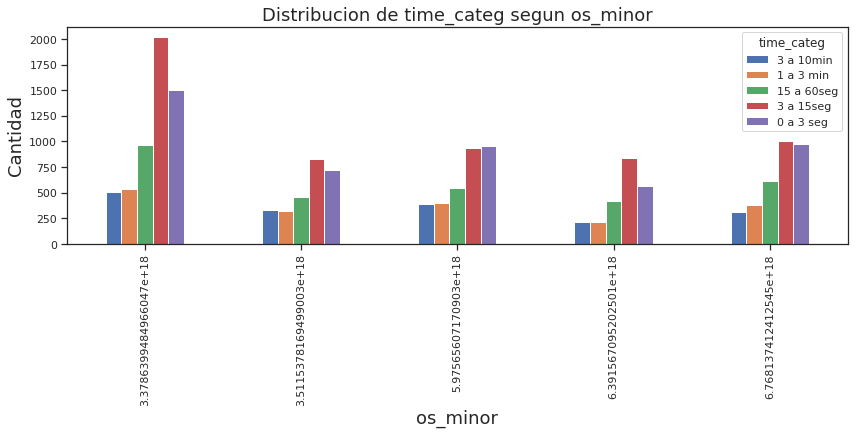

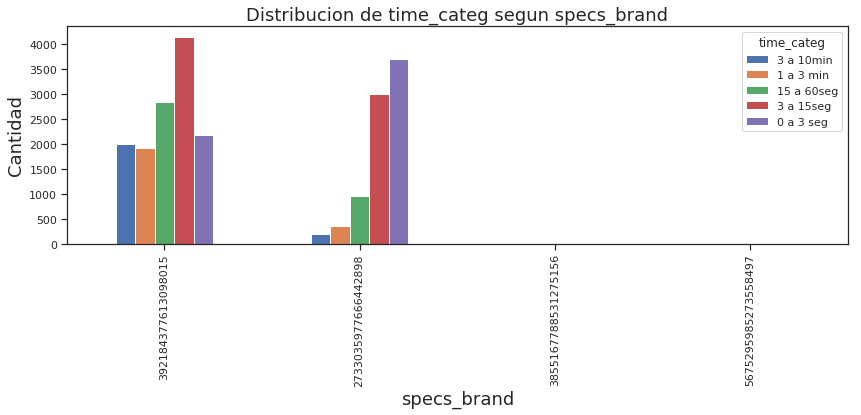

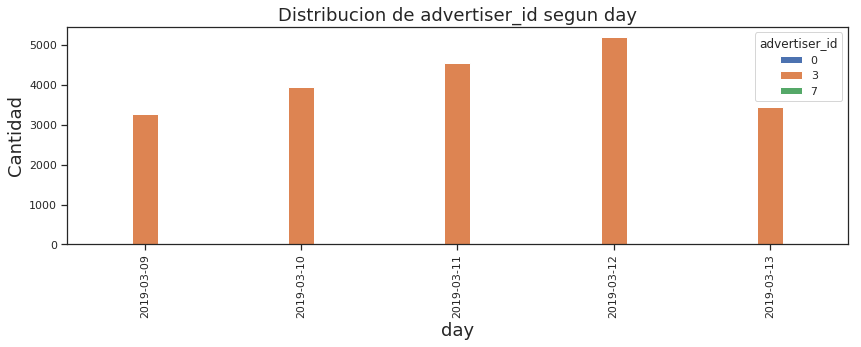

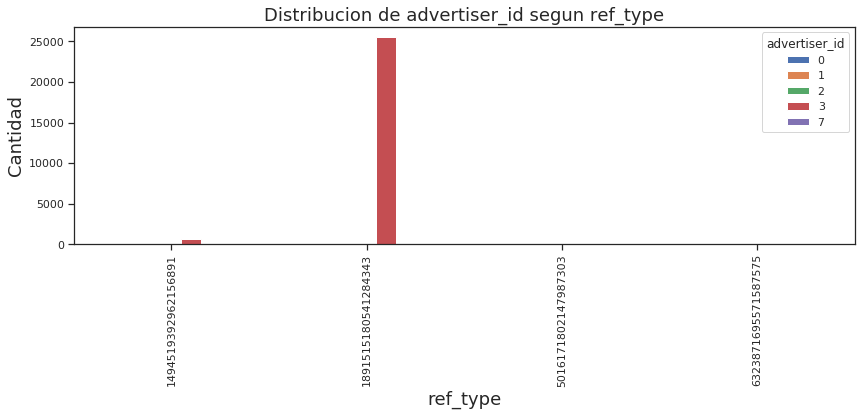

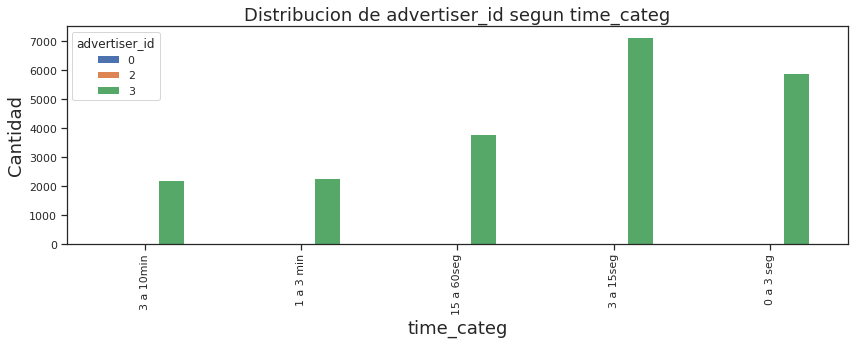

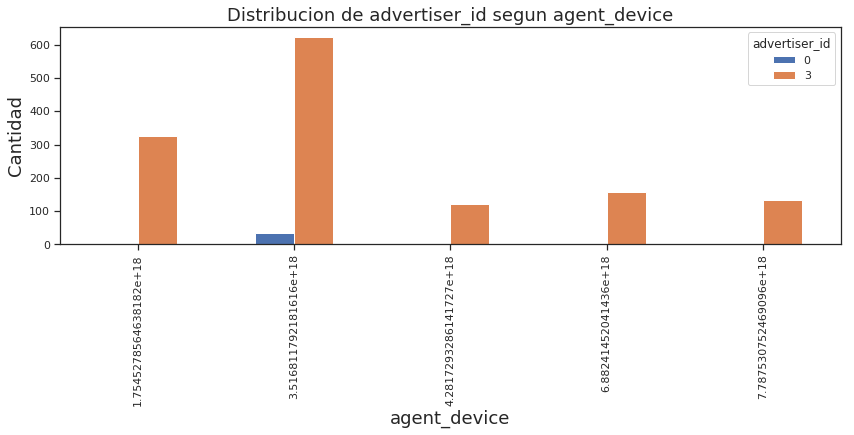

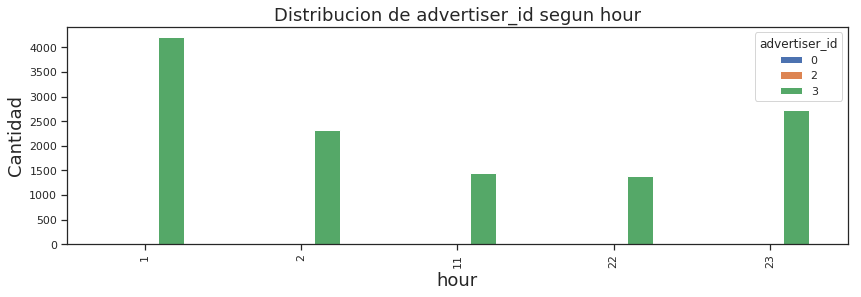

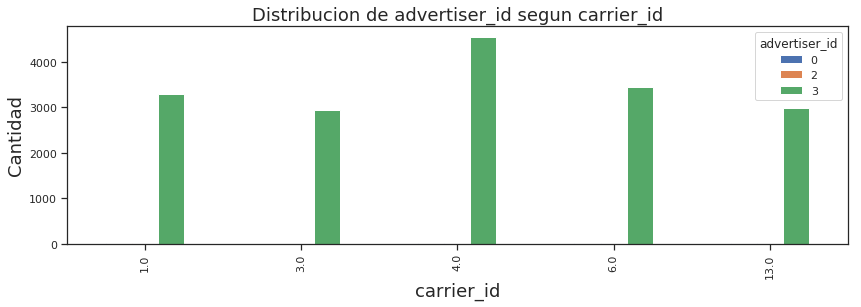

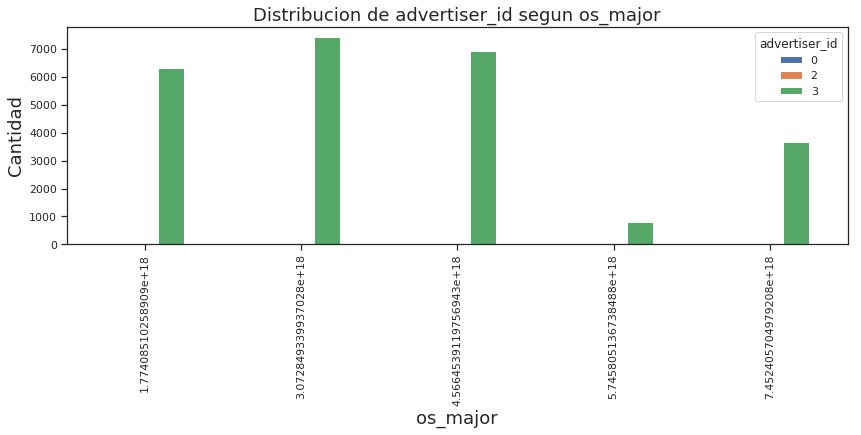

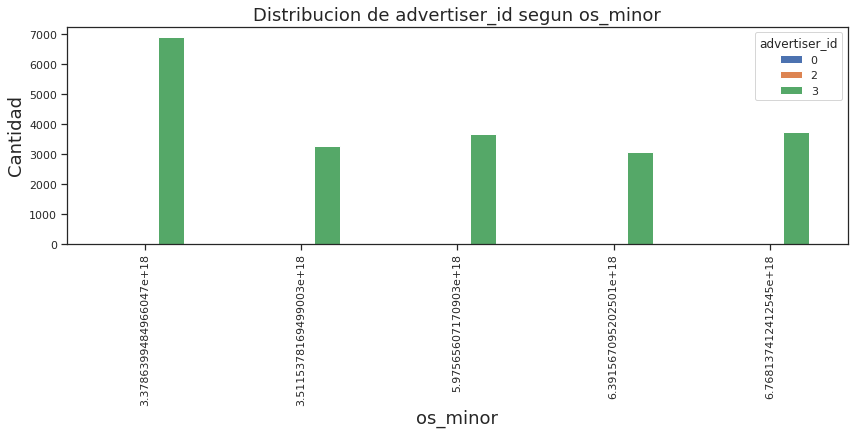

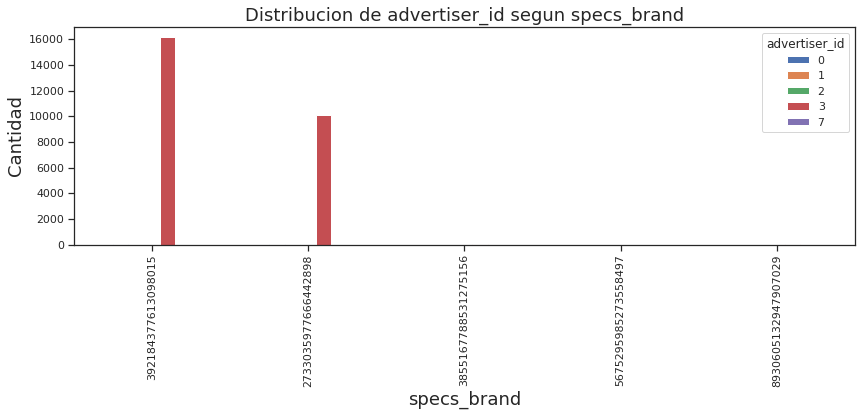

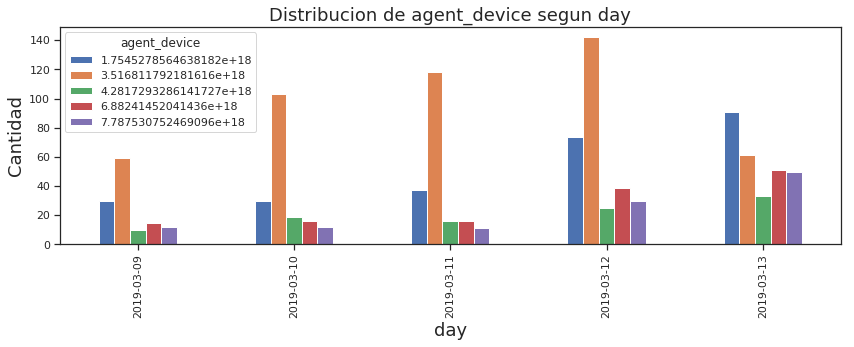

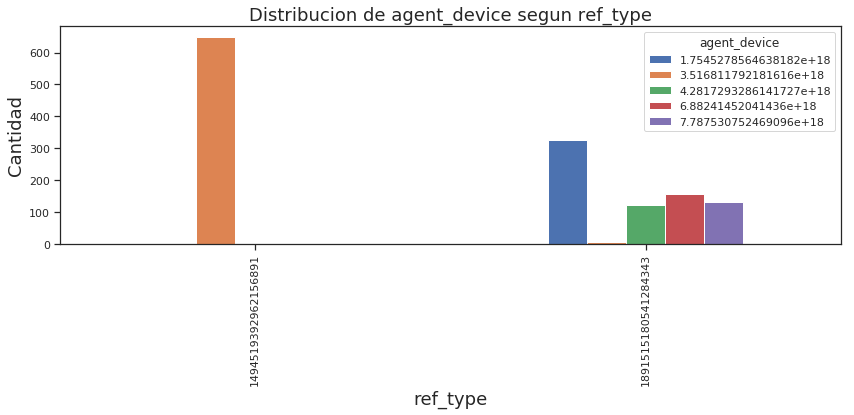

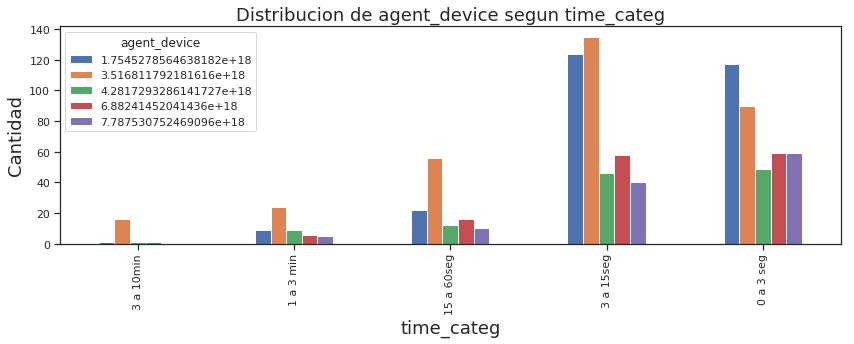

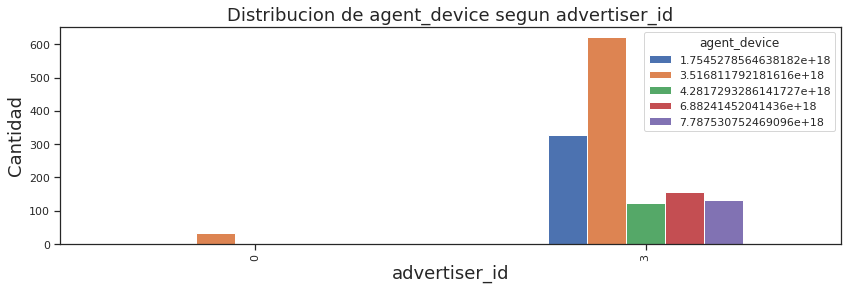

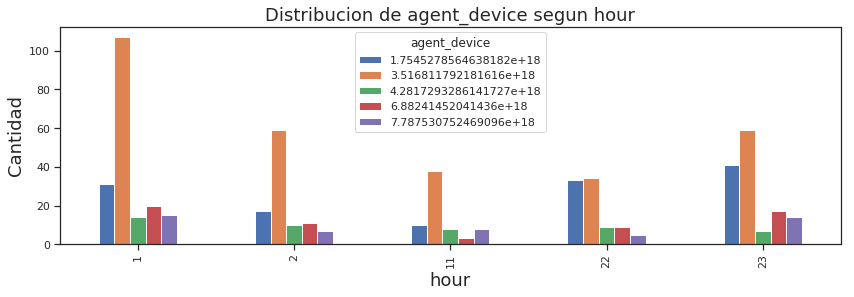

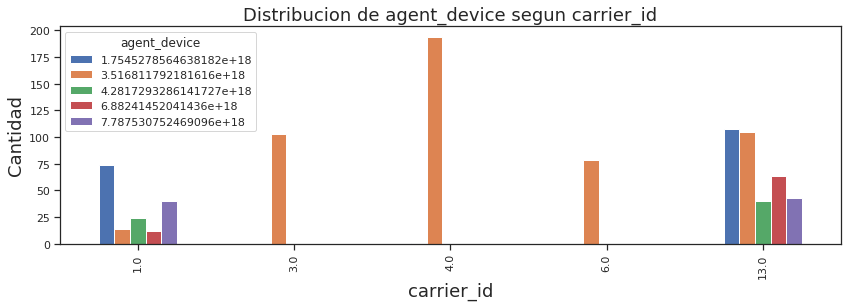

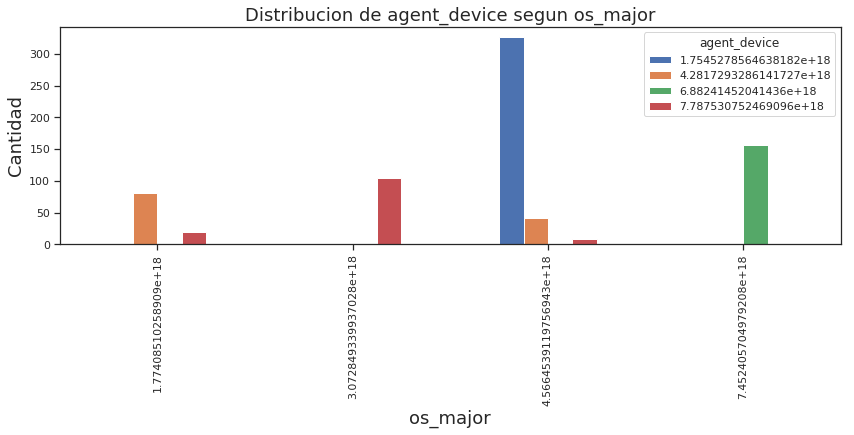

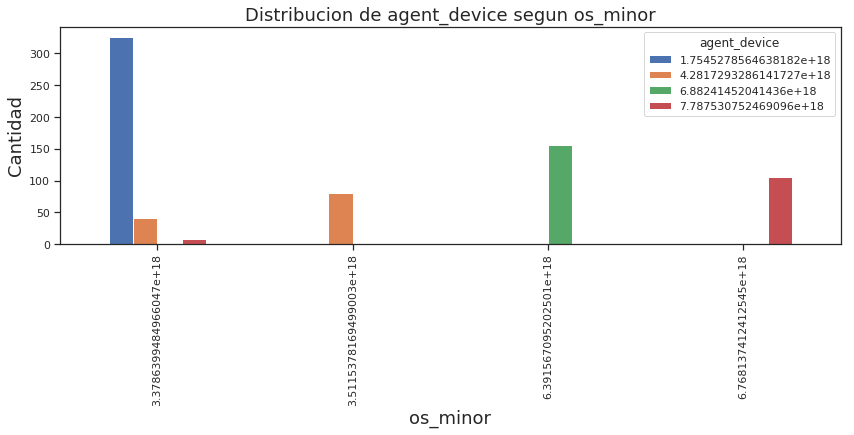

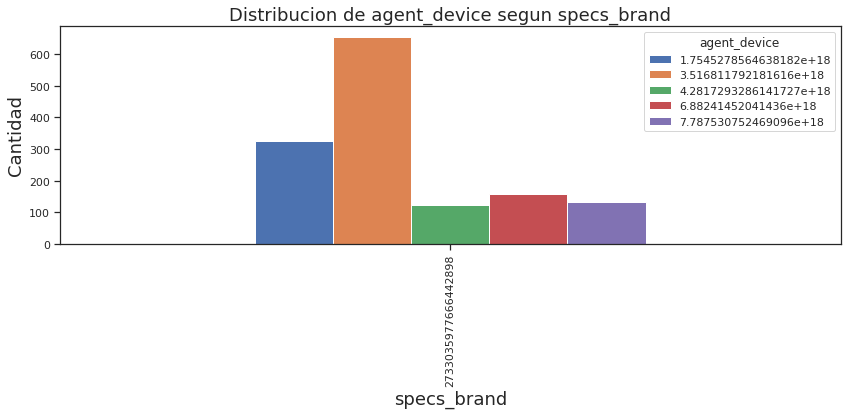

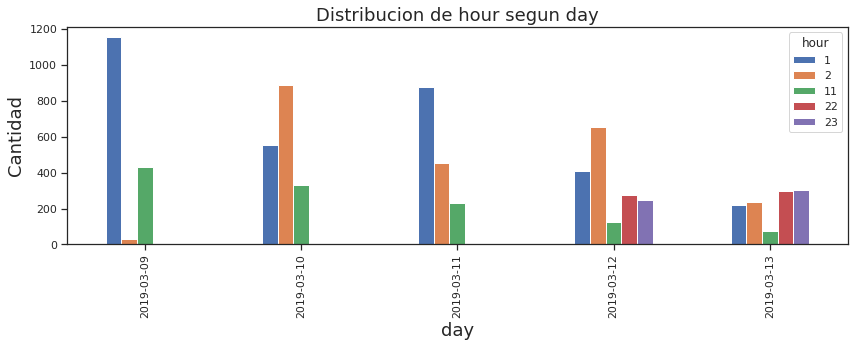

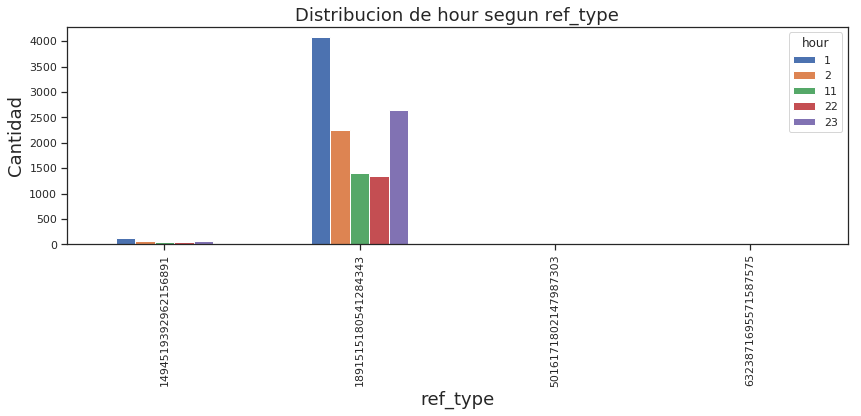

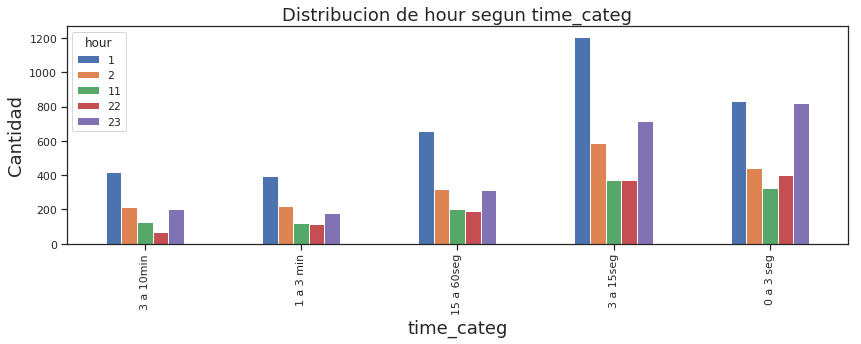

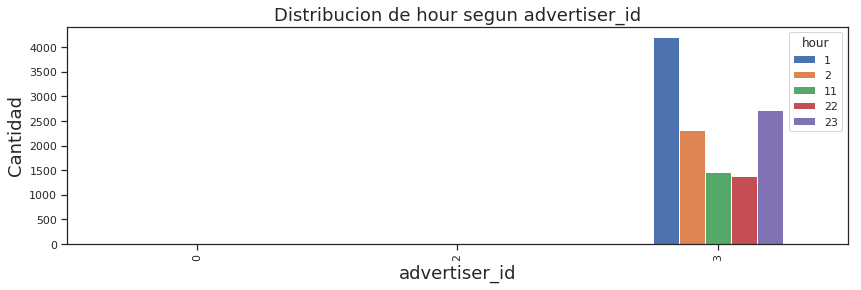

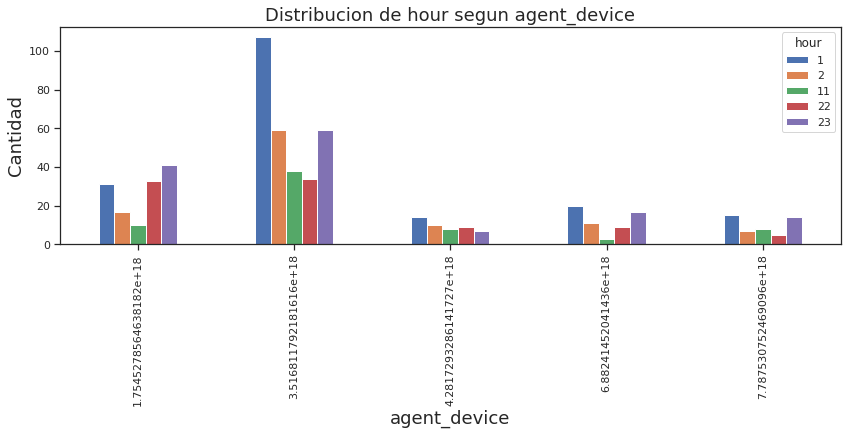

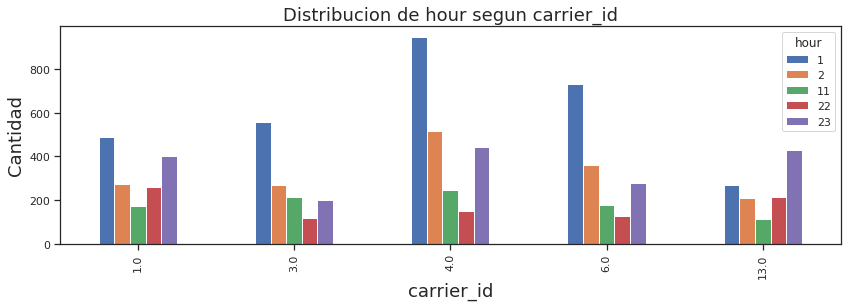

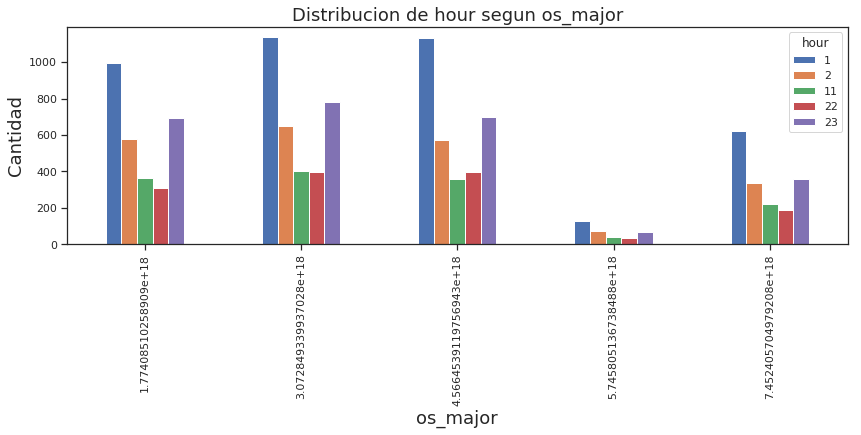

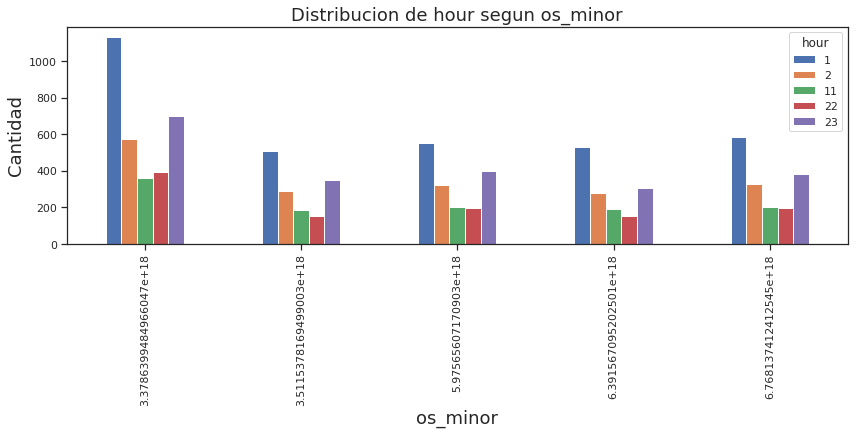

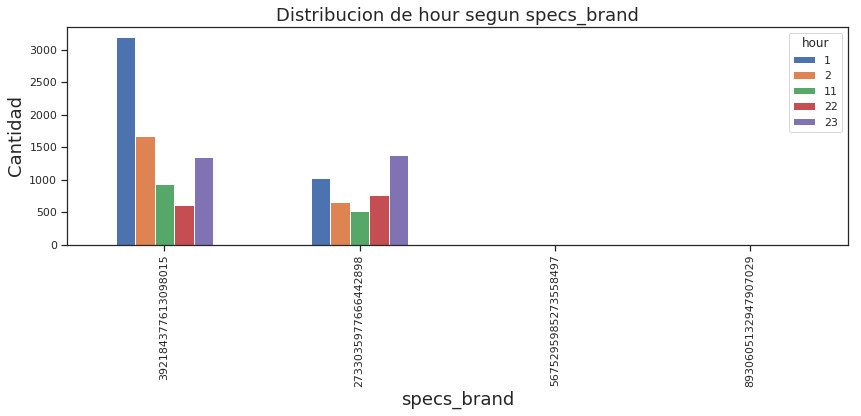

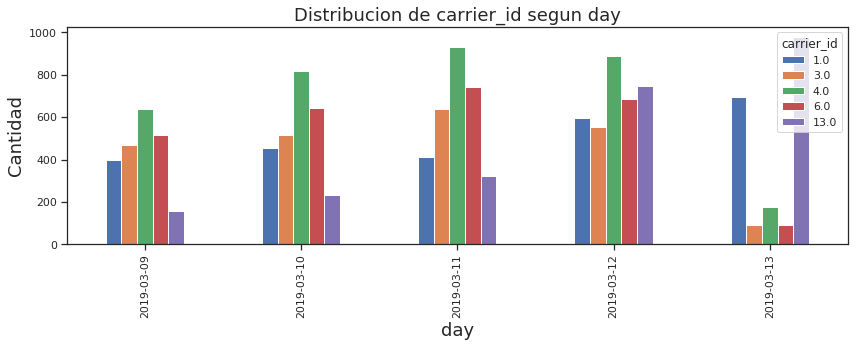

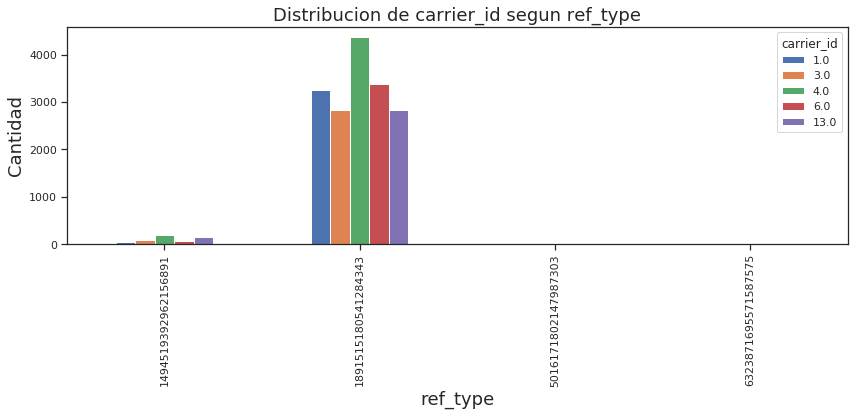

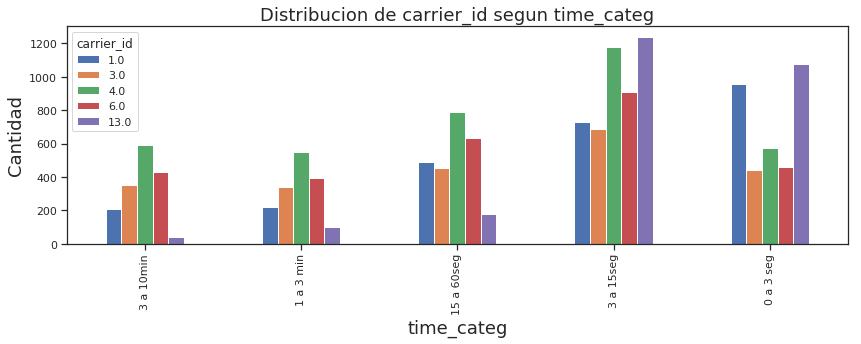

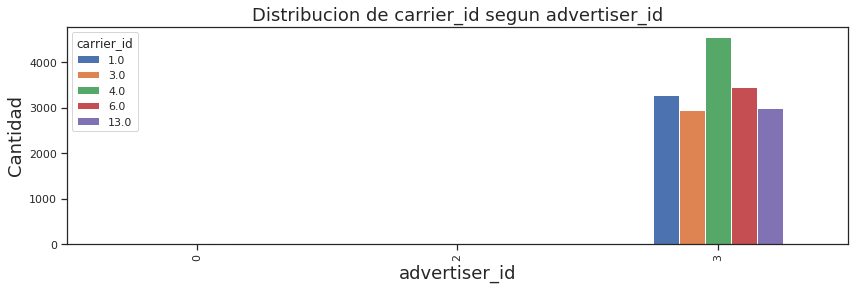

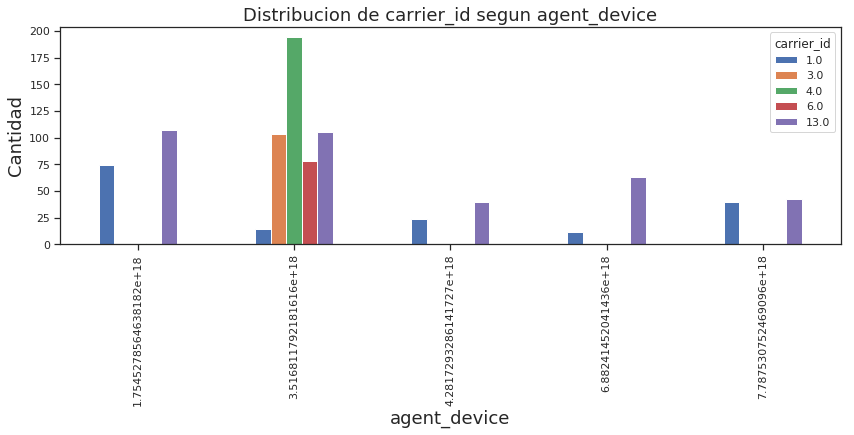

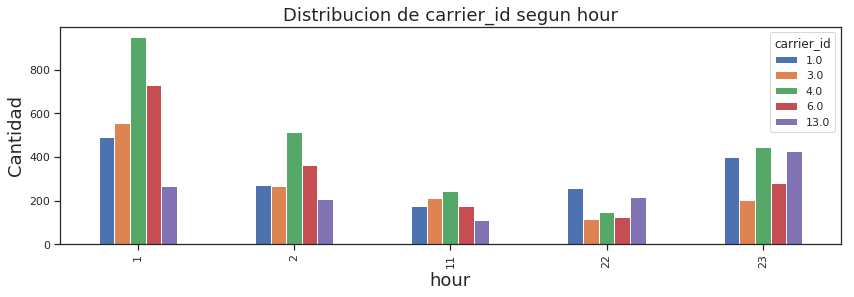

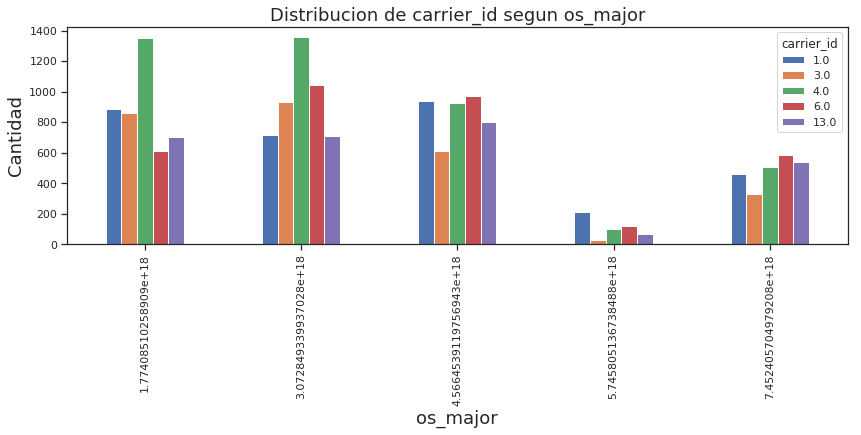

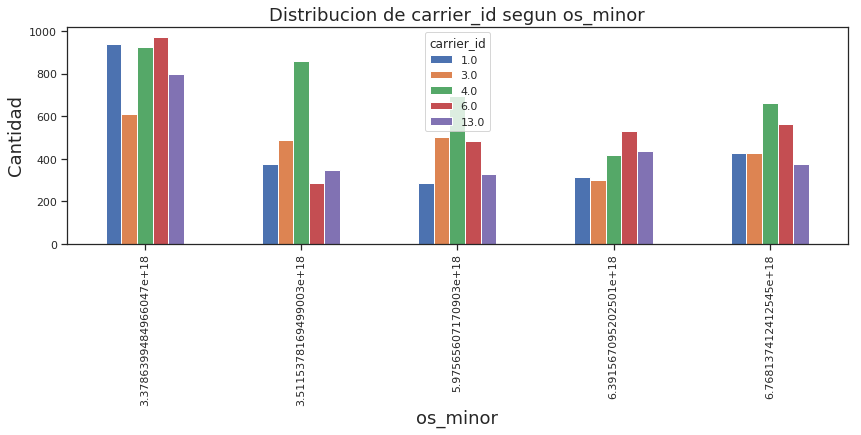

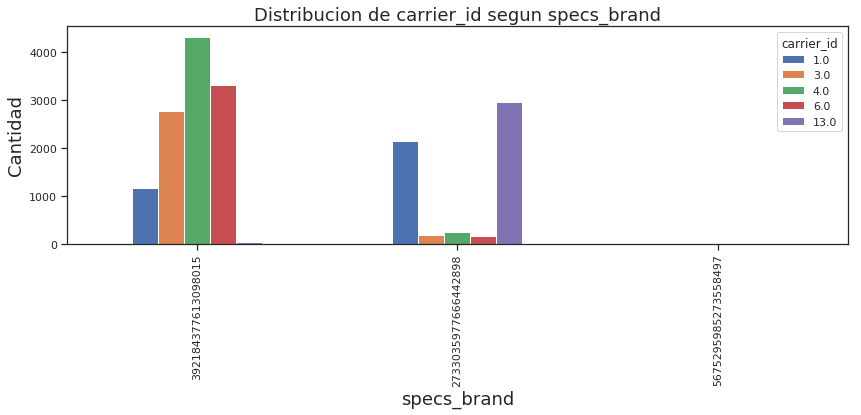

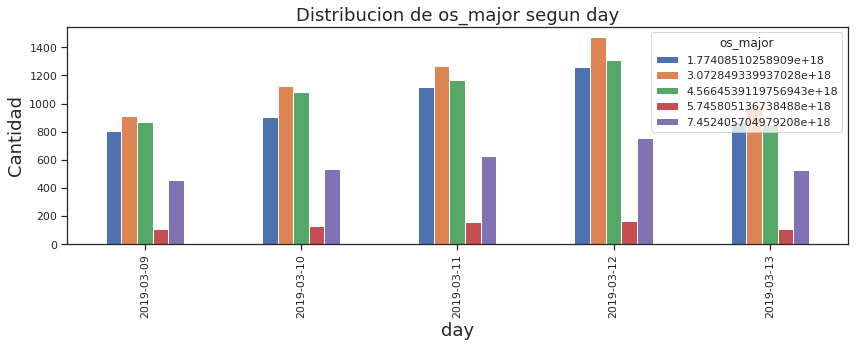

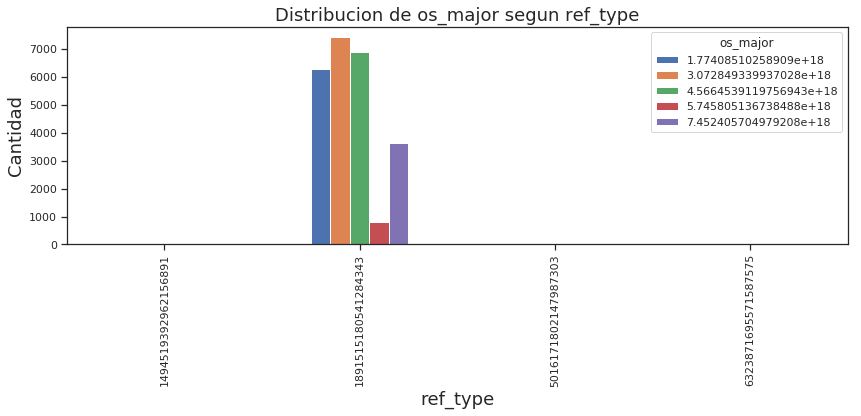

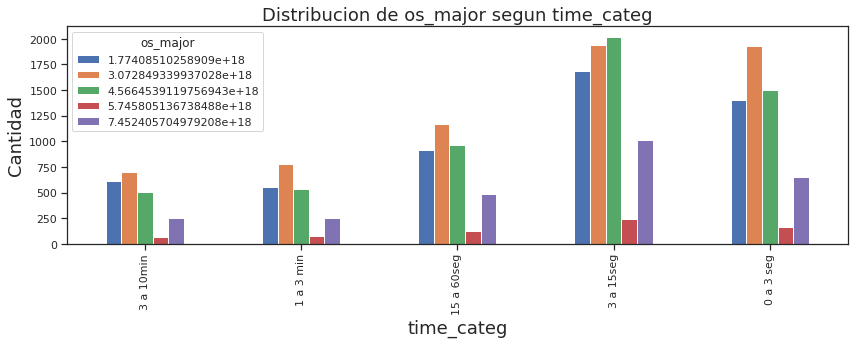

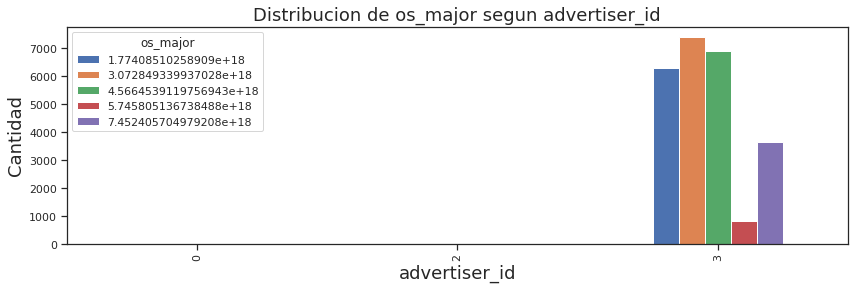

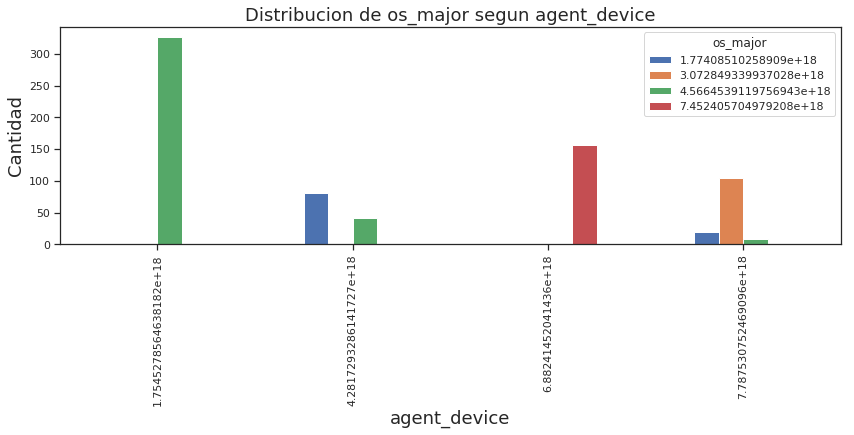

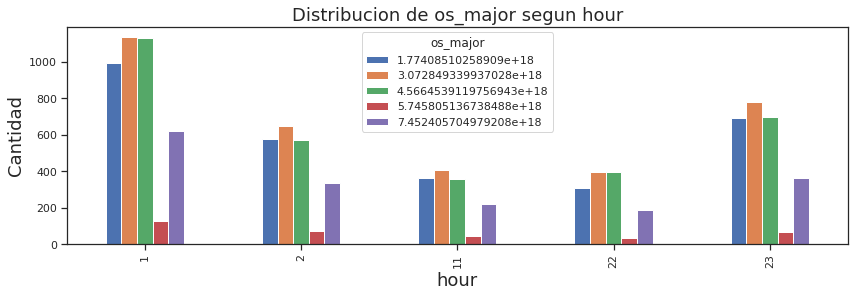

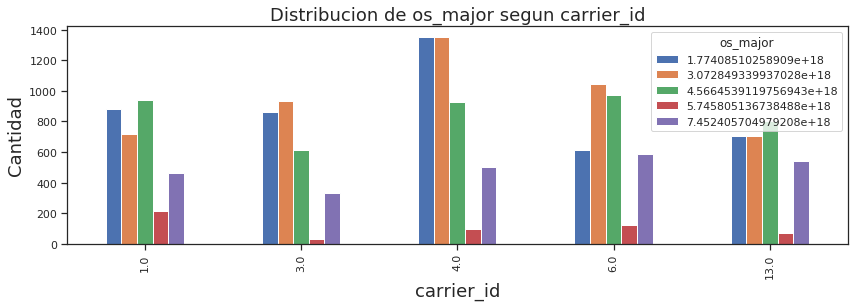

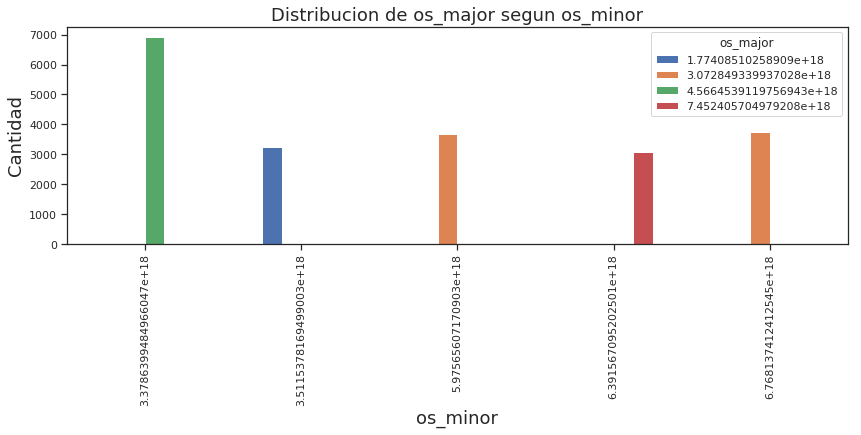

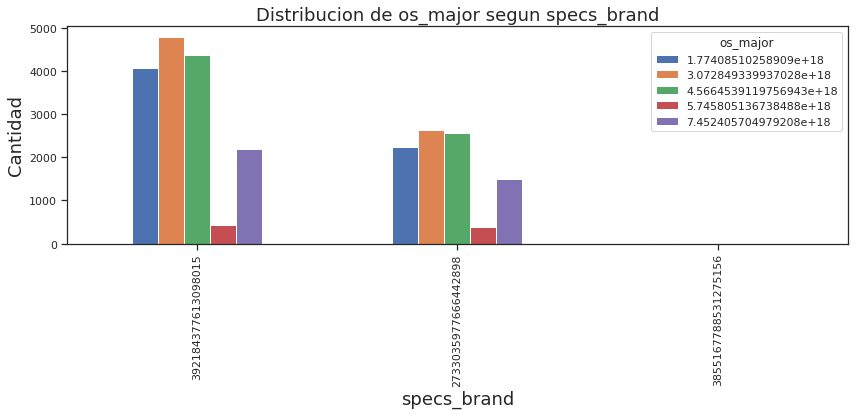

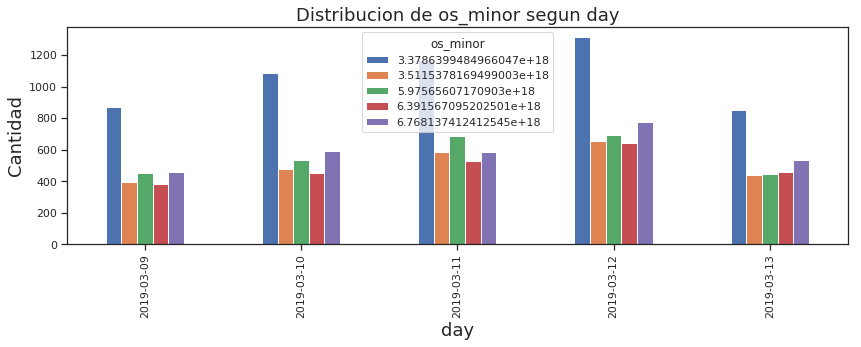

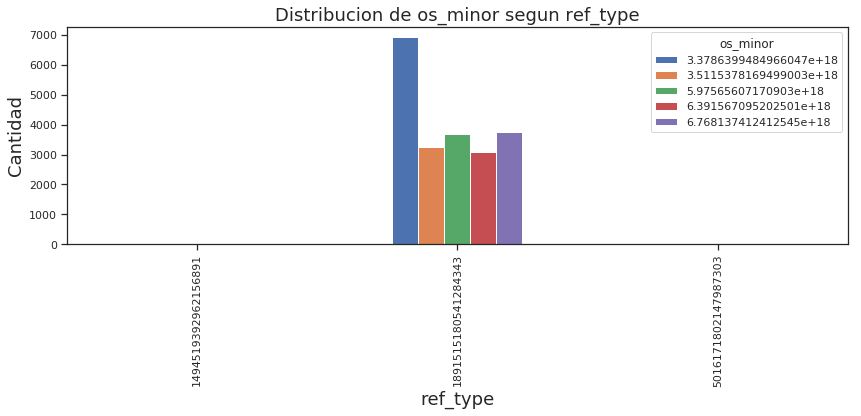

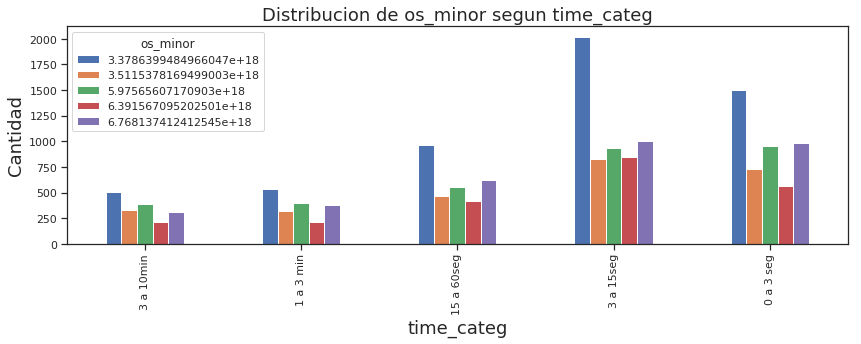

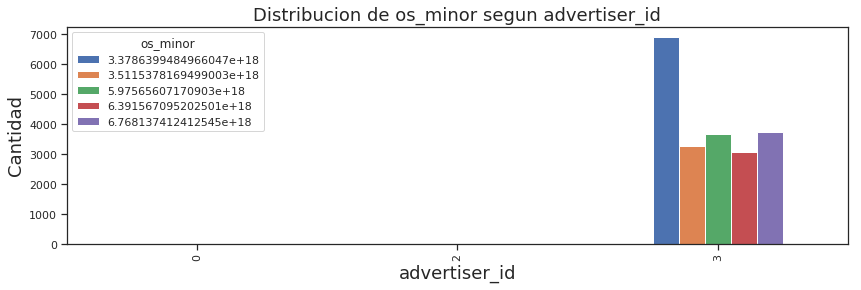

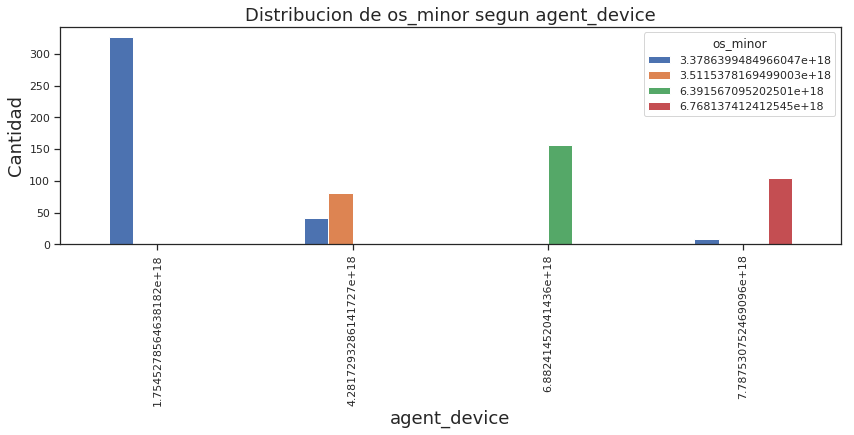

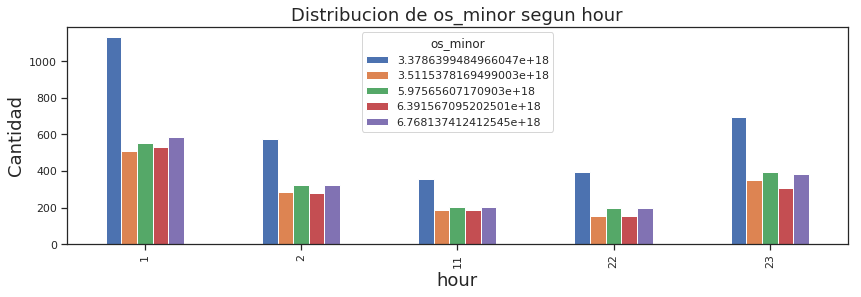

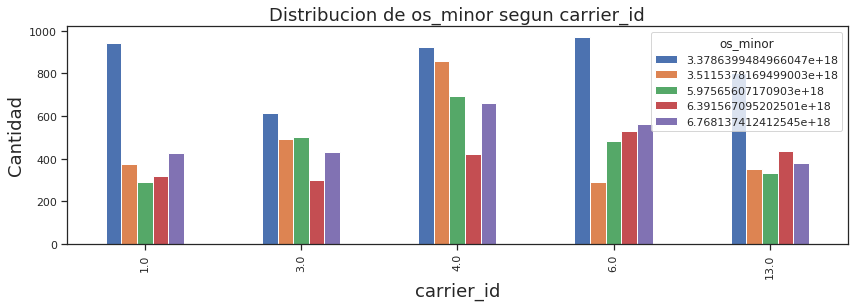

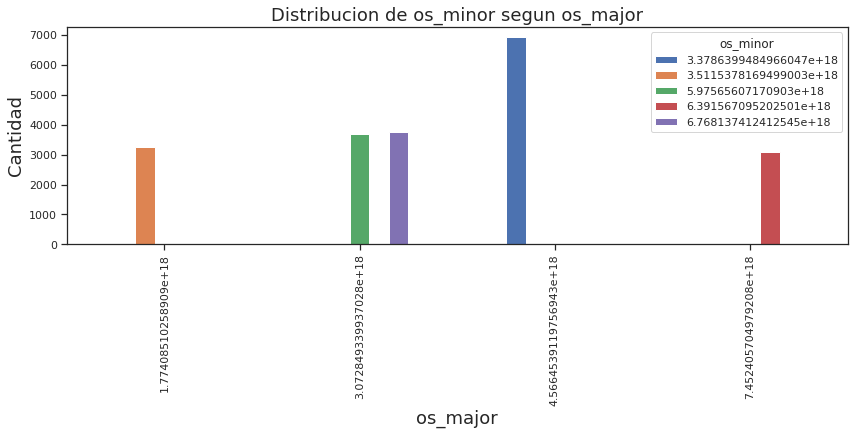

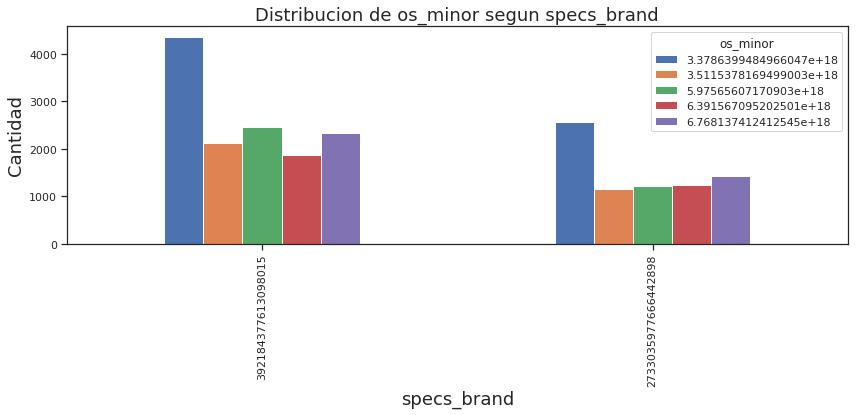

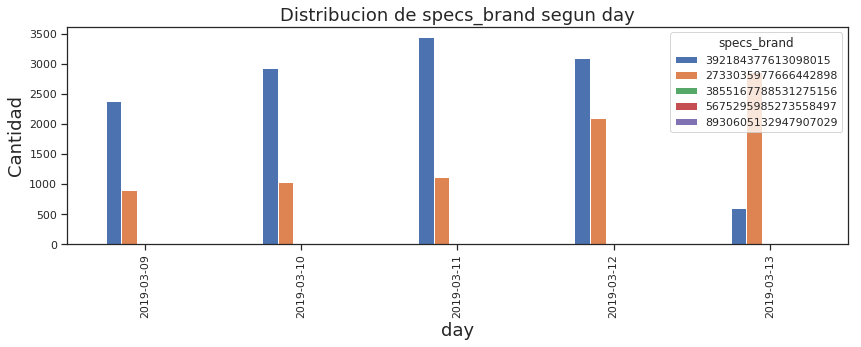

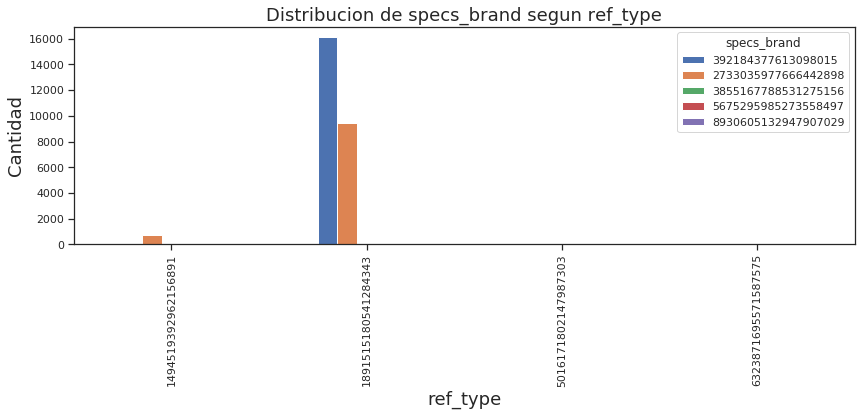

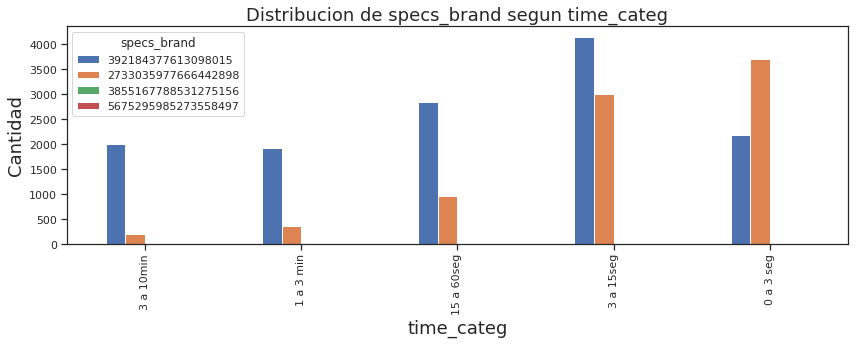

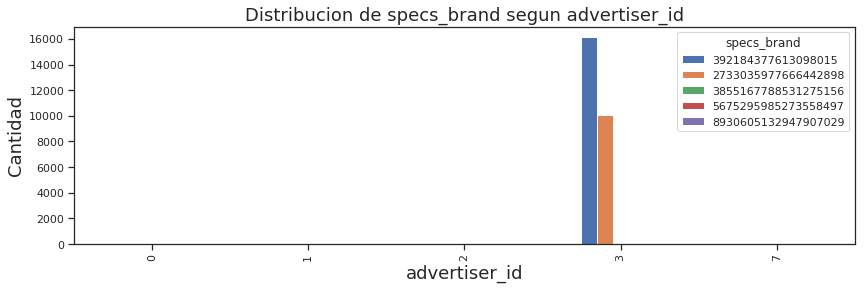

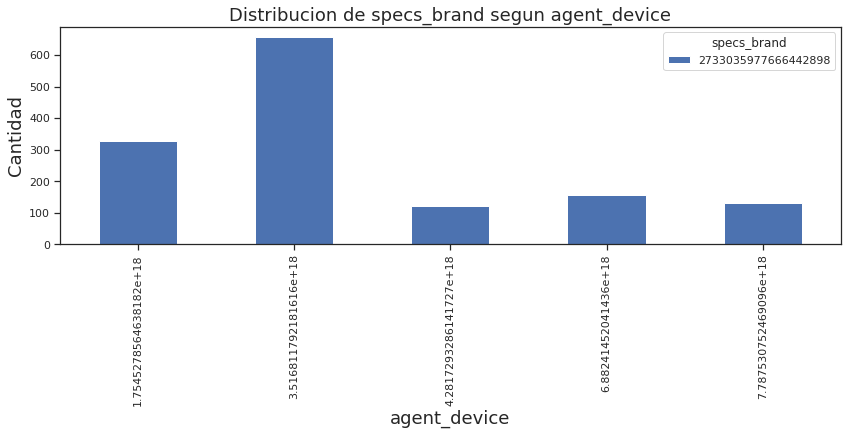

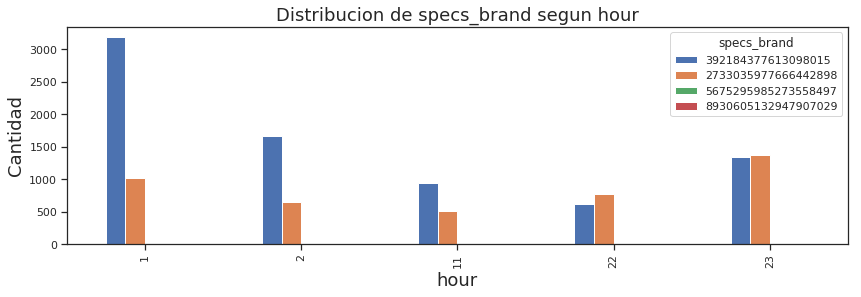

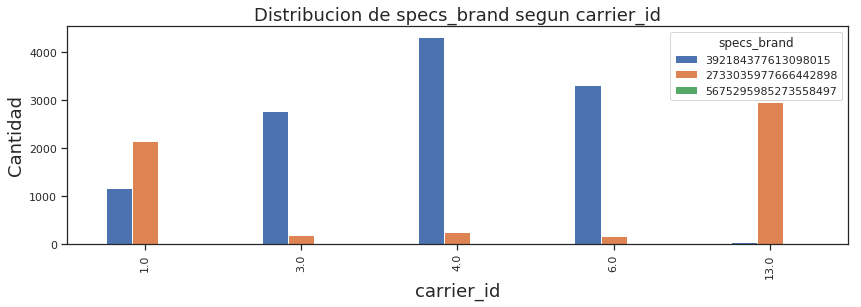

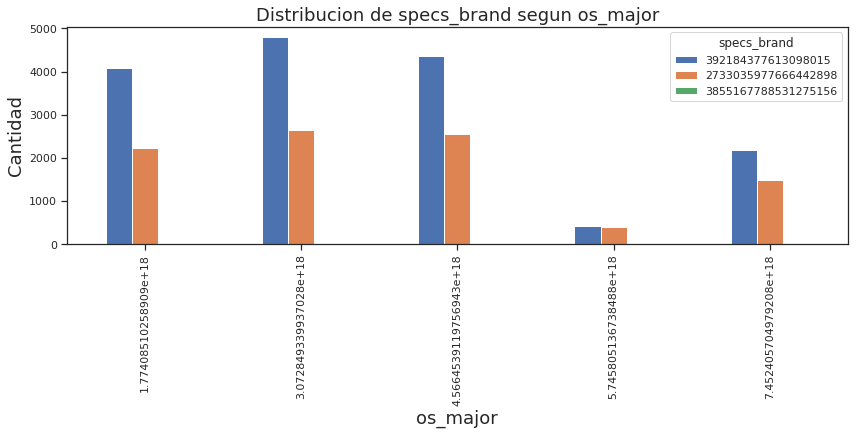

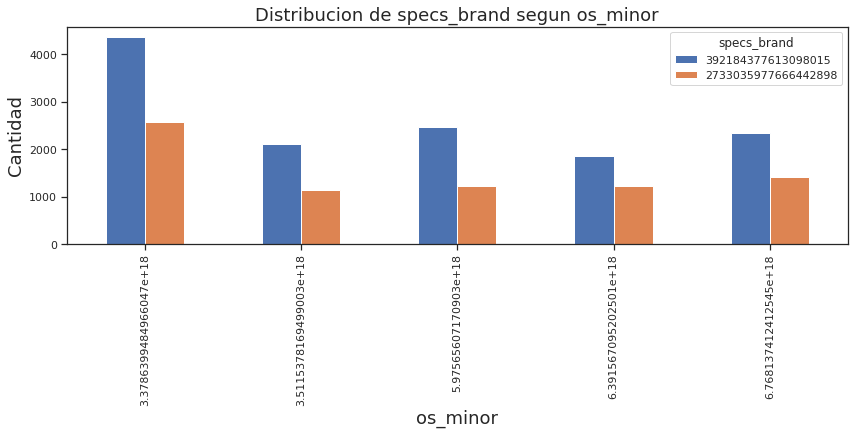

In [20]:
def barplot_doble(i, j):
    clicks_filtrado = clicks.loc[clicks[i].isin(top5[i])].loc[clicks[j].isin(top5[j])]
    if clicks_filtrado.empty:
        print('no pude hacer barplot de ' + j + ' segun ' + i)
        return
    plot = pd.crosstab(clicks_filtrado[j], clicks_filtrado[i]).plot(kind='bar',figsize=(14,4));
    plot.set_title('Distribucion de ' + i + ' segun ' + j, fontsize=18)
    plot.set_xlabel(j,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('clicks/top5'+str(j)+'_segun_top5'+str(i)+'.png', bbox_inches = 'tight')

for i in top5.keys():
    for j in top5.keys():
        if i != j:
            barplot_doble(i, j)

## Buscamos la relacion de alguna variable con el time_categ utilizando un heatmap

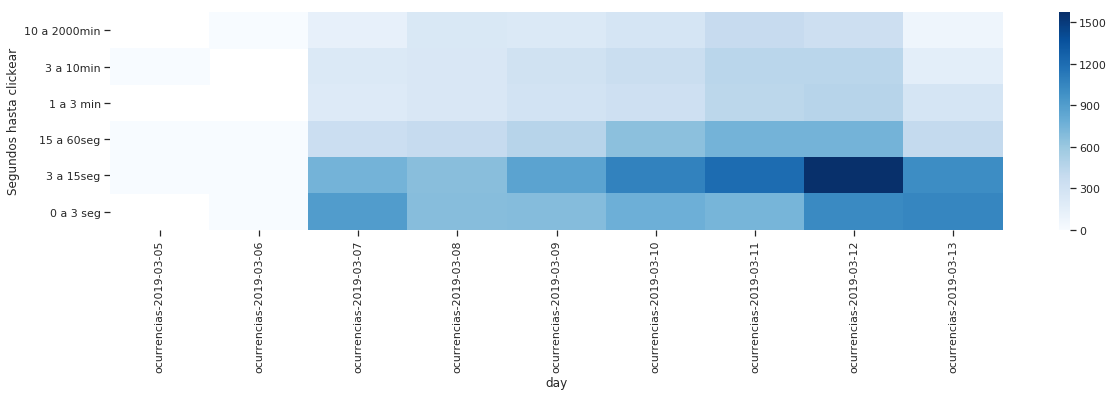

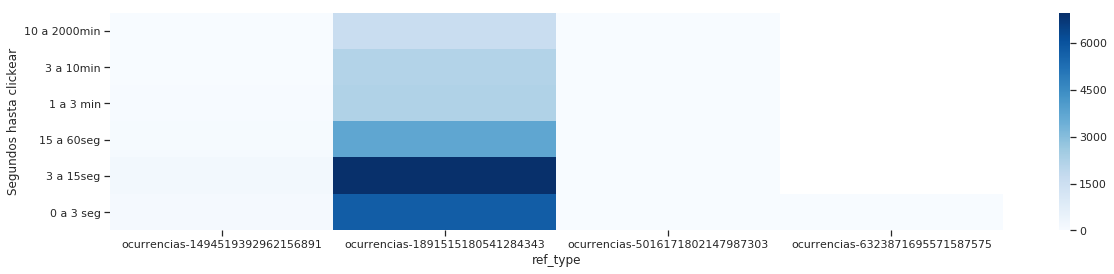

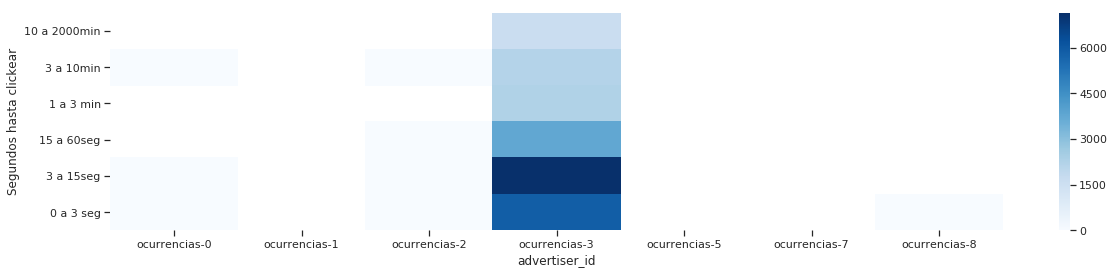

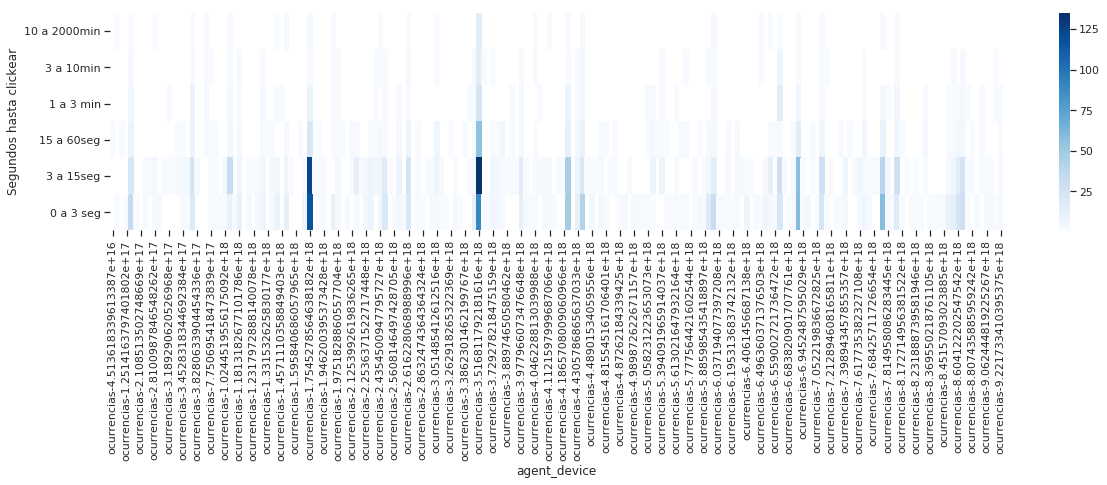

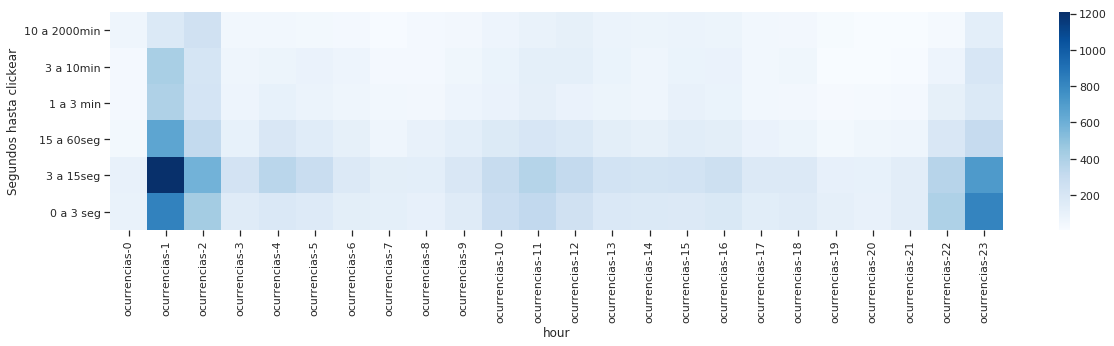

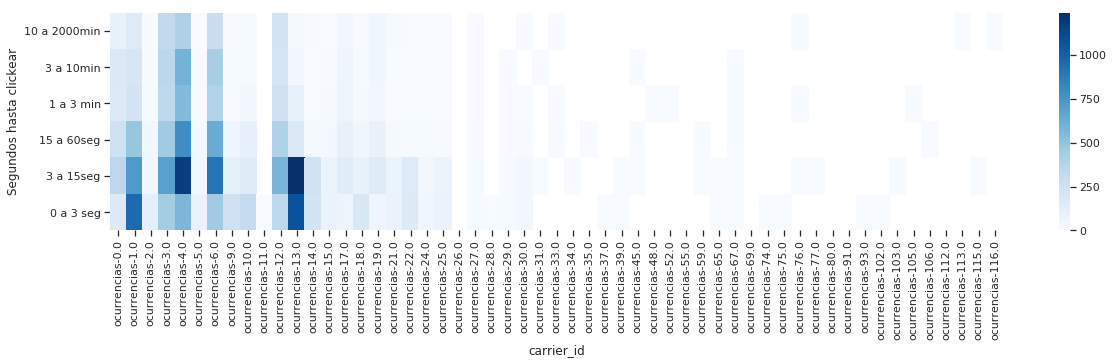

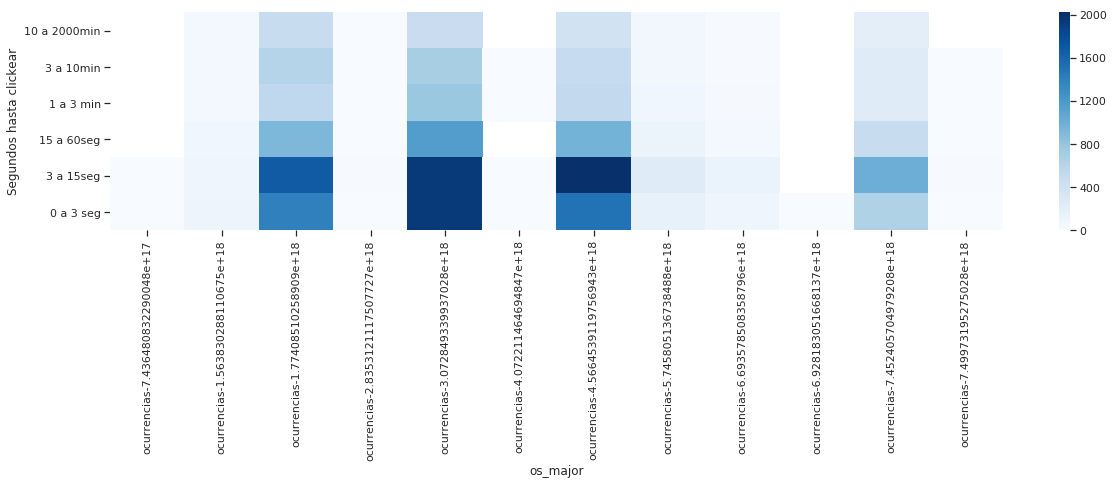

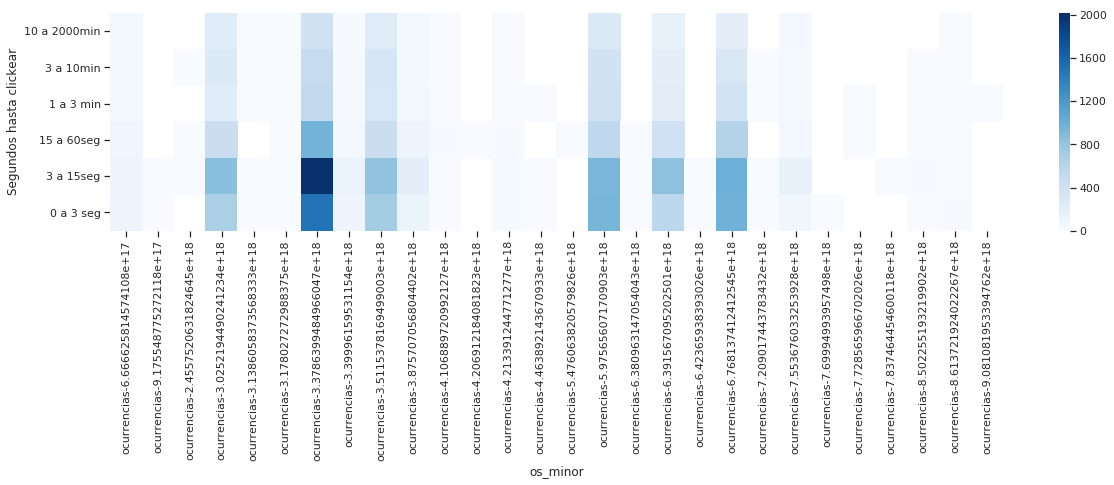

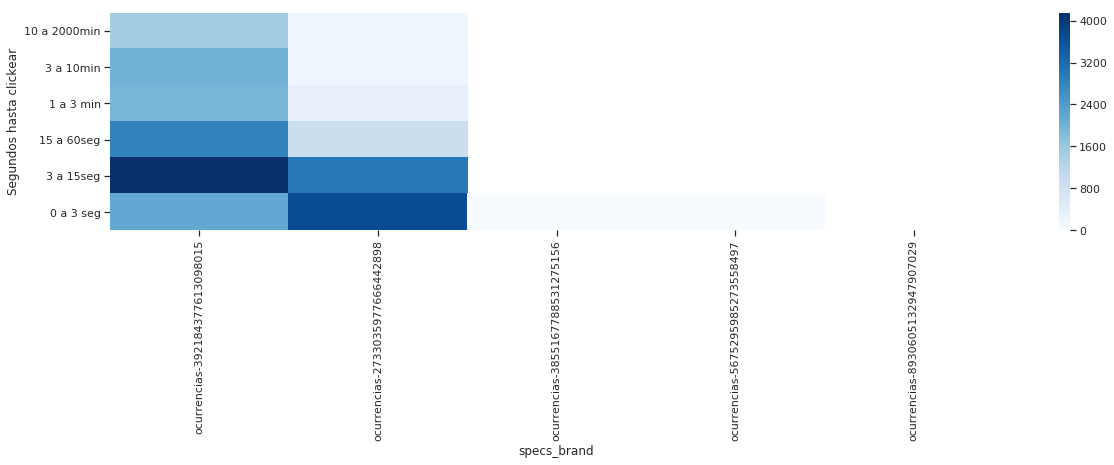

In [21]:
clicks['ocurrencias']= 1

for i in top5.keys():
    if i != 'time_categ':
        matriz = clicks[['time_categ',i, 'ocurrencias']].groupby(['time_categ',i]).count().unstack()
        fig, ax = plt.subplots(figsize=(20,4))
        ax.set_xticks([])
        ax.set_yticks([])
        sns.heatmap(matriz,fmt="", cmap='Blues',ax=ax);
        ax.set_ylabel("Segundos hasta clickear",fontsize=12)
        ax.set_xlabel(i,fontsize=12)

## Buscamos la distribucion de cada columna a lo largo de cada fecha

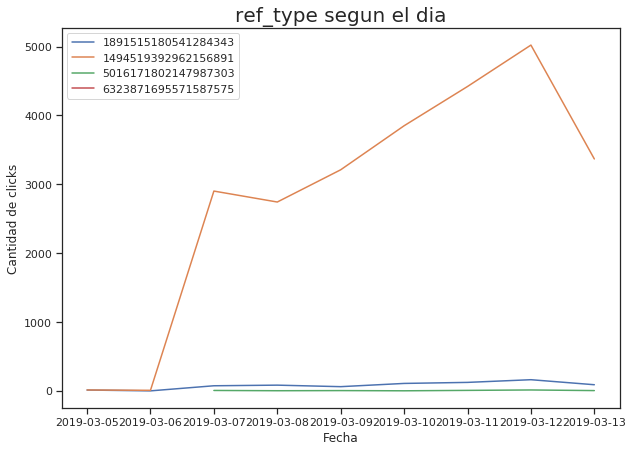

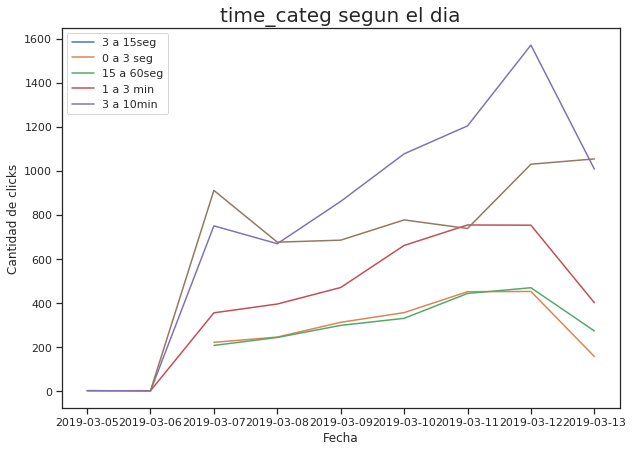

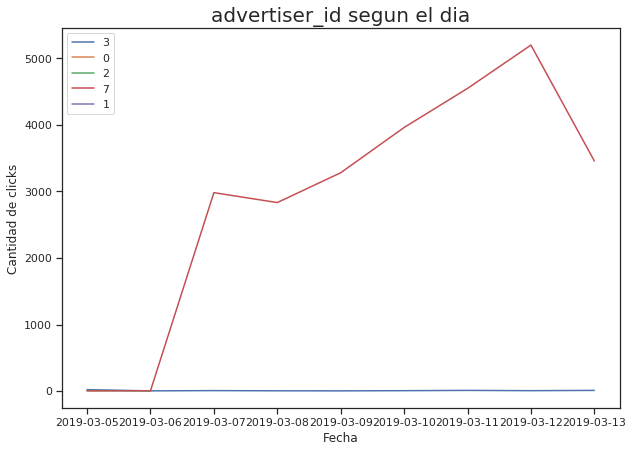

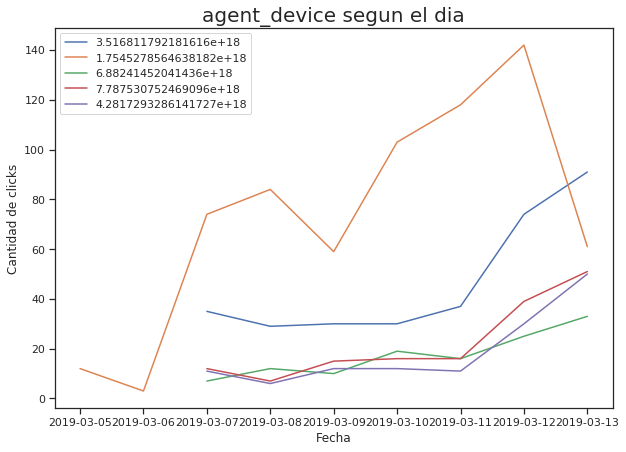

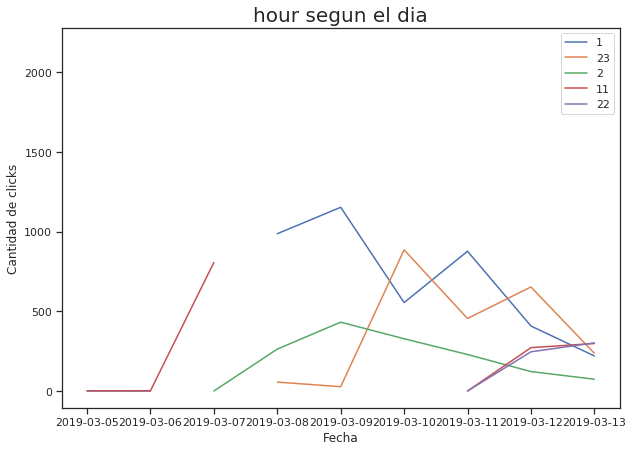

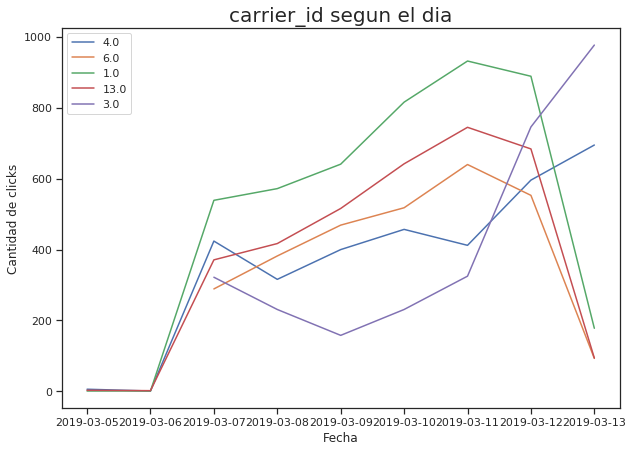

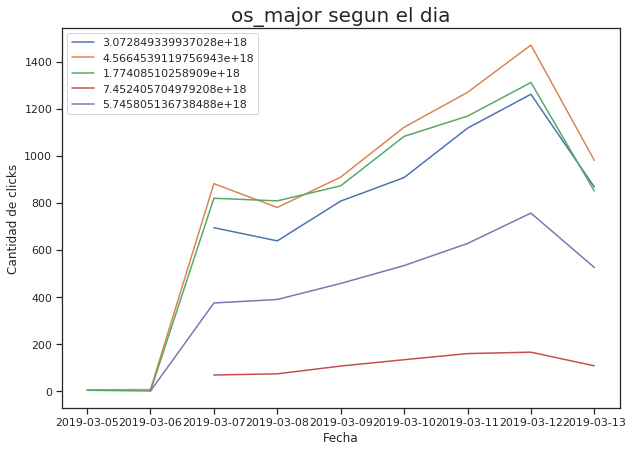

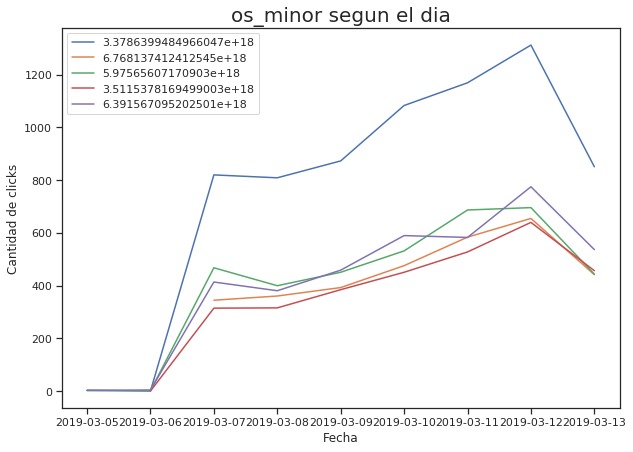

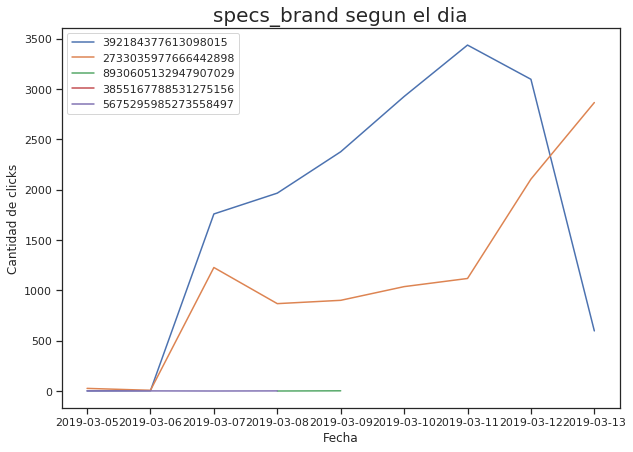

In [22]:
for i in top5.keys():
    if i != 'day':
        clicks.loc[clicks[i].isin(top5[i])][['day',i, 'ocurrencias']].groupby(['day',i]).count().unstack().plot(figsize = (10,7))
        plt.ylabel('Cantidad de clicks')
        plt.xlabel('Fecha')
        plt.title(i + ' segun el dia',fontsize=20)
        plt.legend(top5[i])
        plt.savefig('clicks/lineplot_top5' + i + '.png', bbox_inches = 'tight')

## Vemos un heatmap de fecha y hora mostrando la cantidad de registros filtrados para cada valor comun de las columnas

/home/gonzalo/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


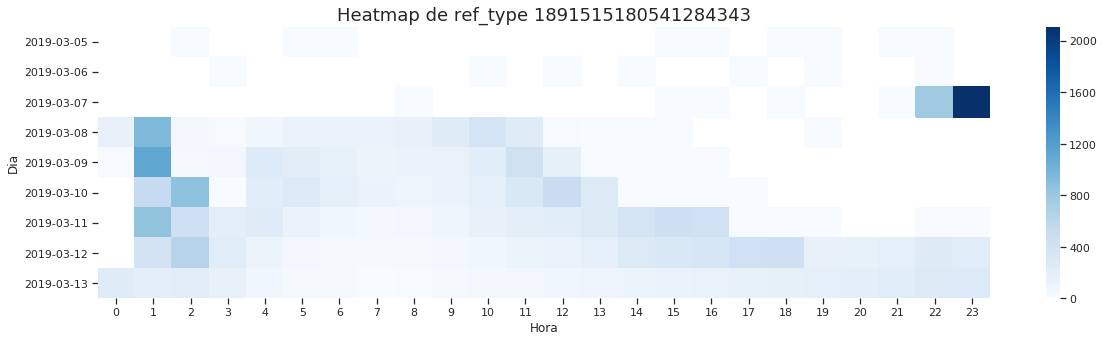

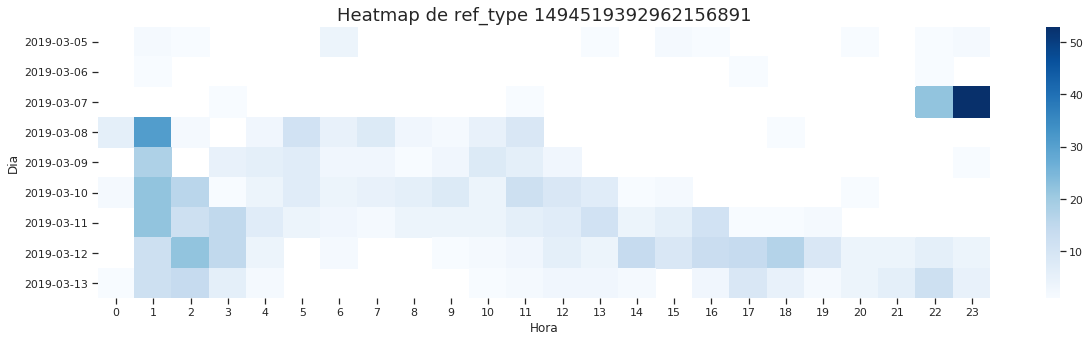

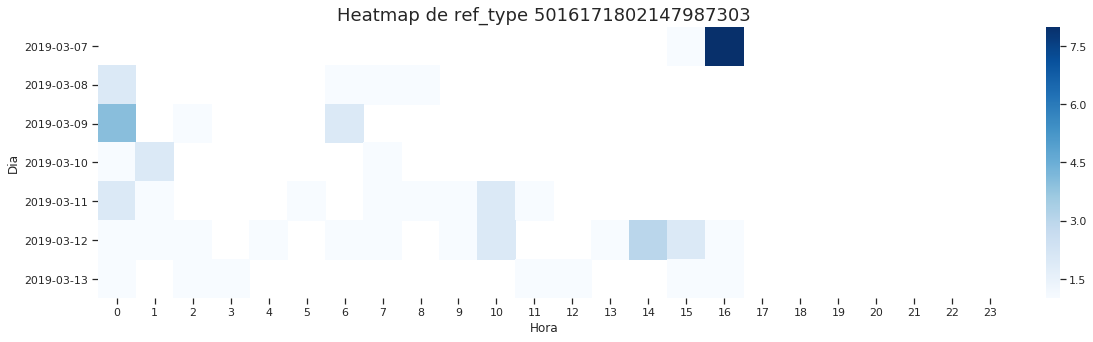

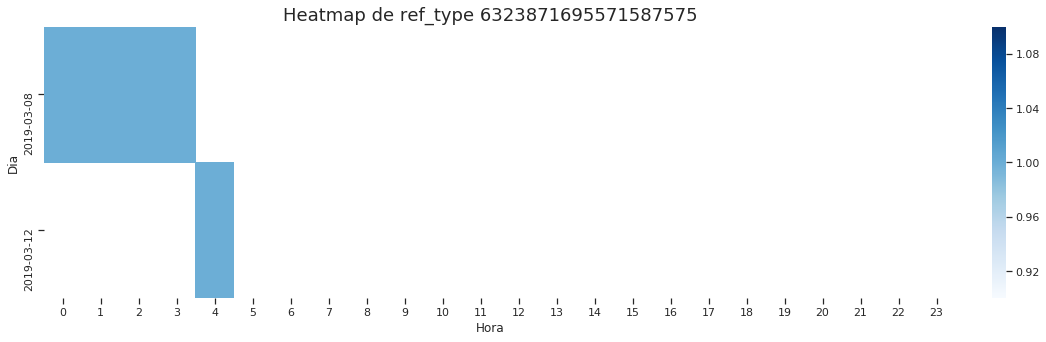

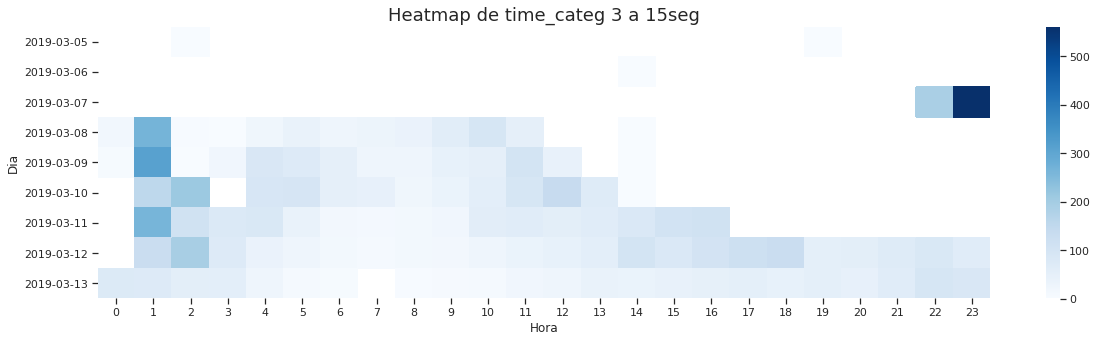

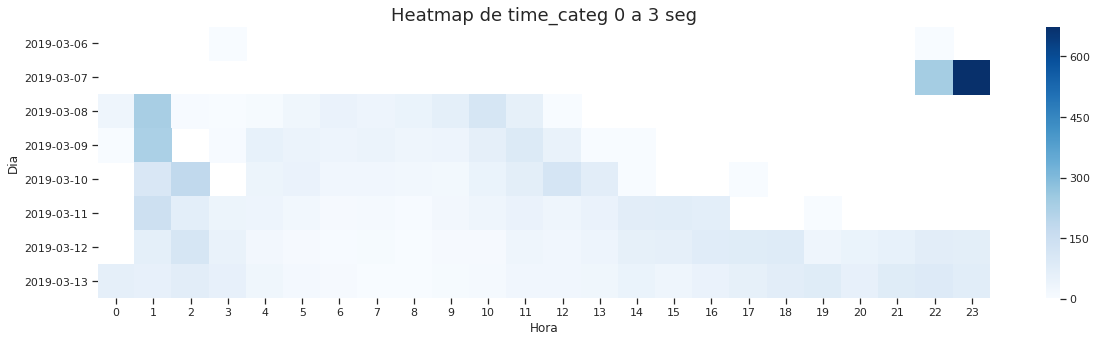

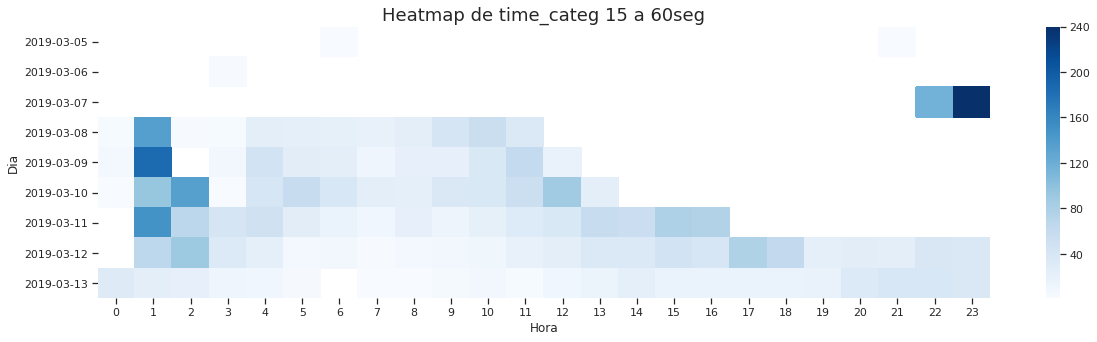

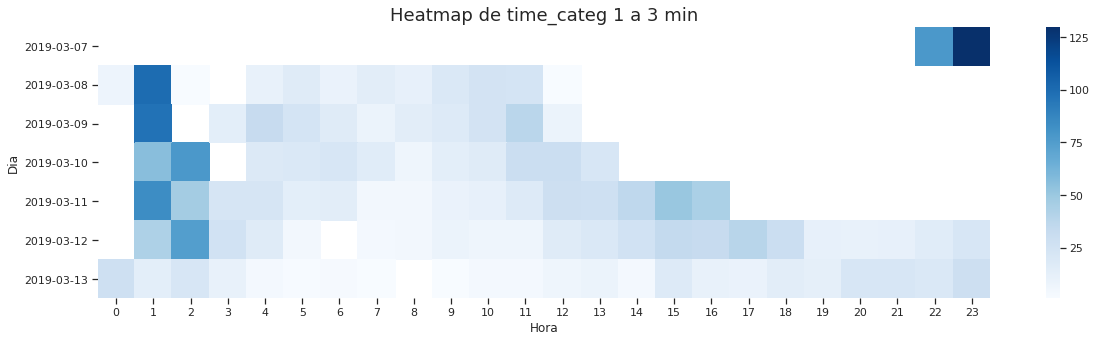

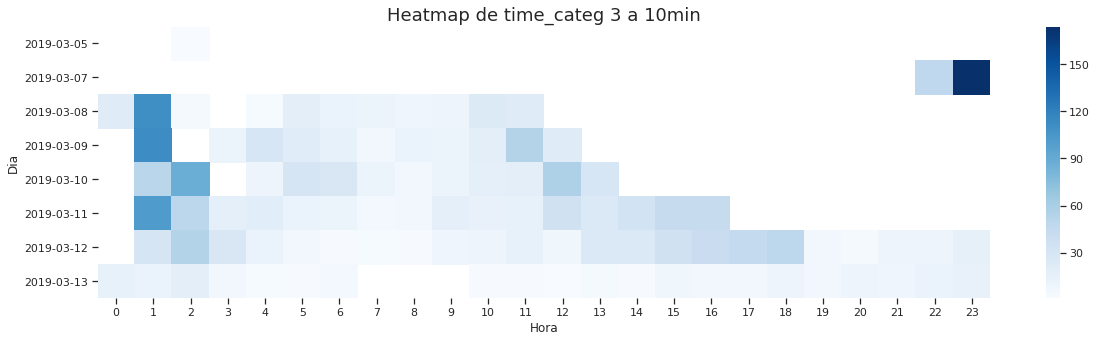

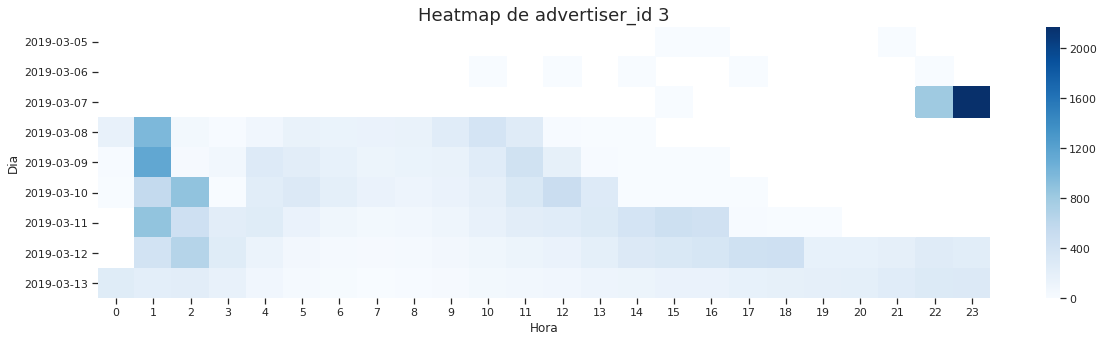

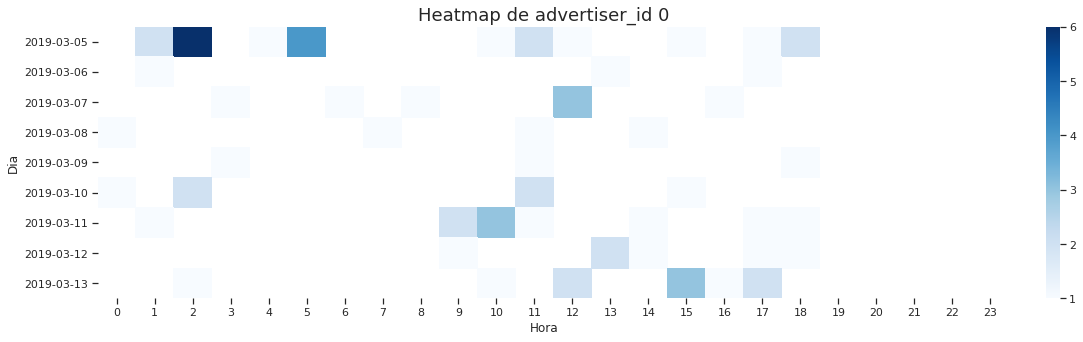

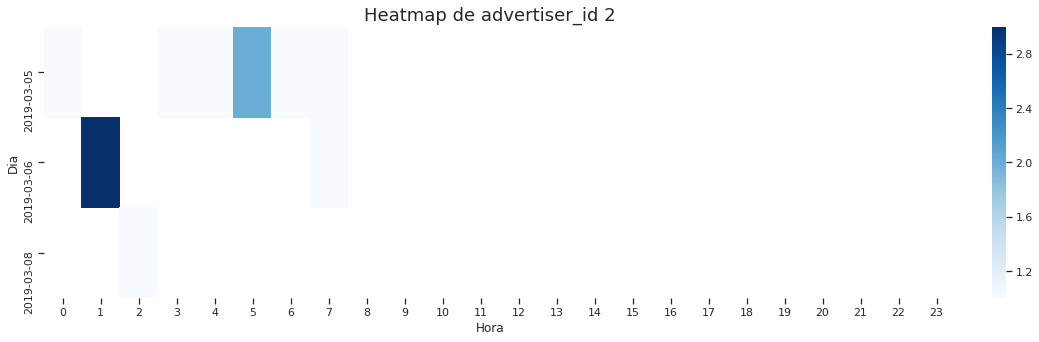

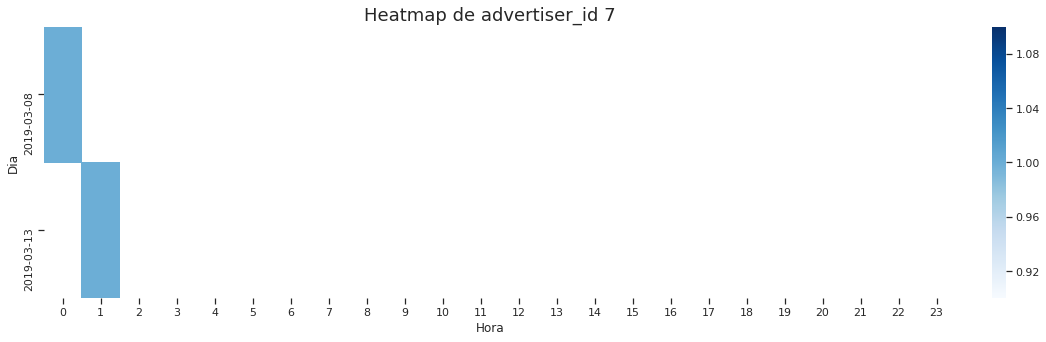

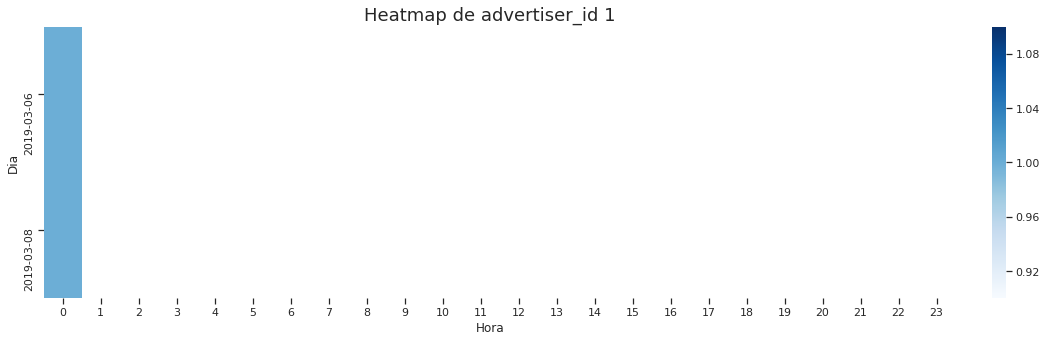

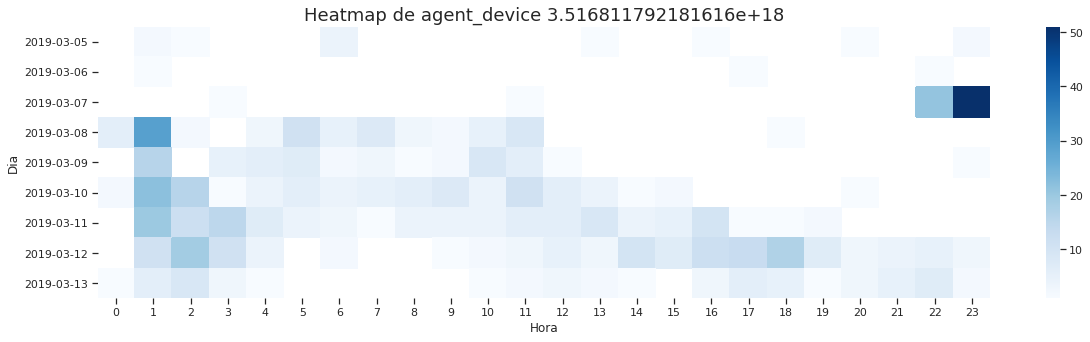

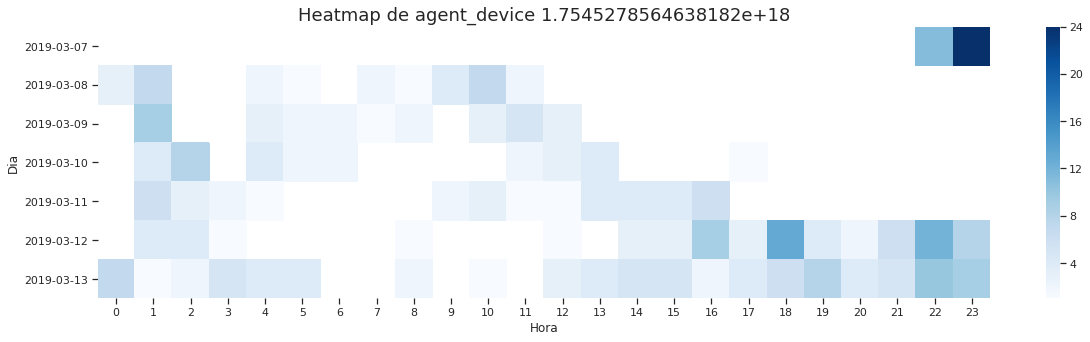

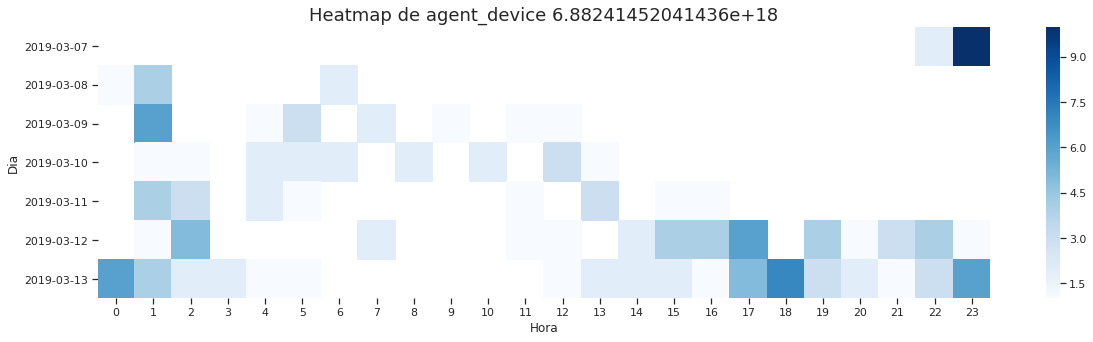

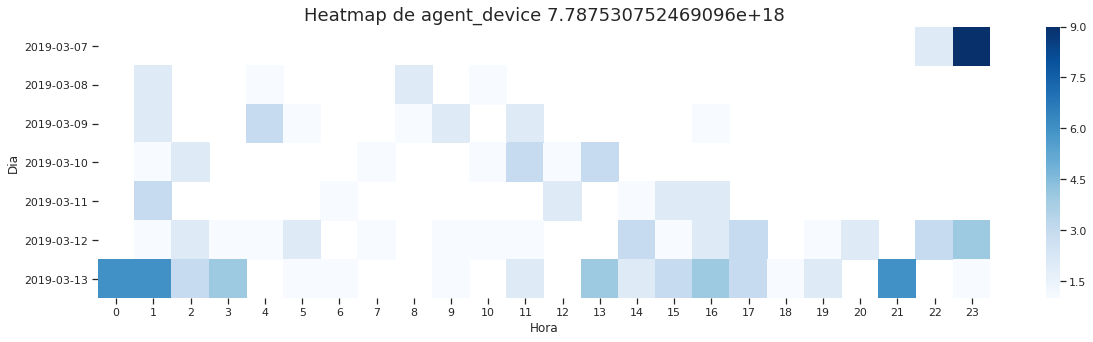

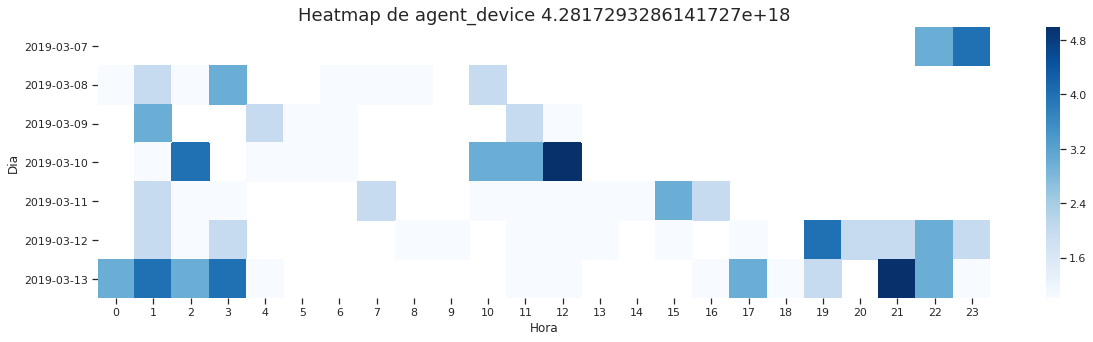

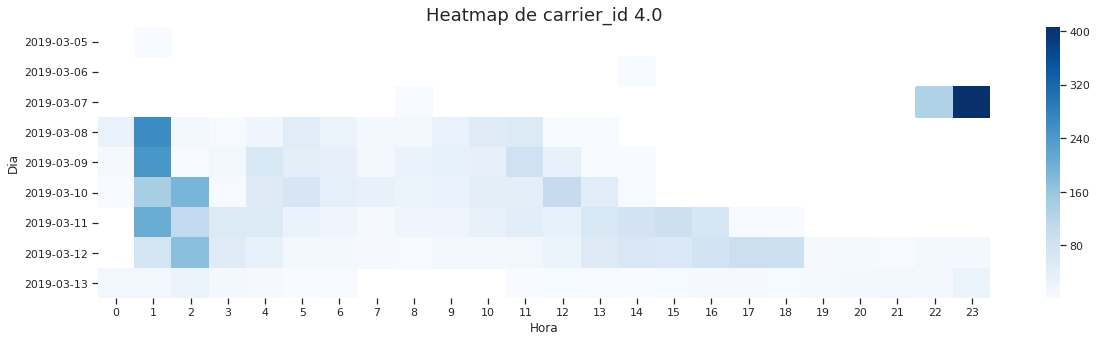

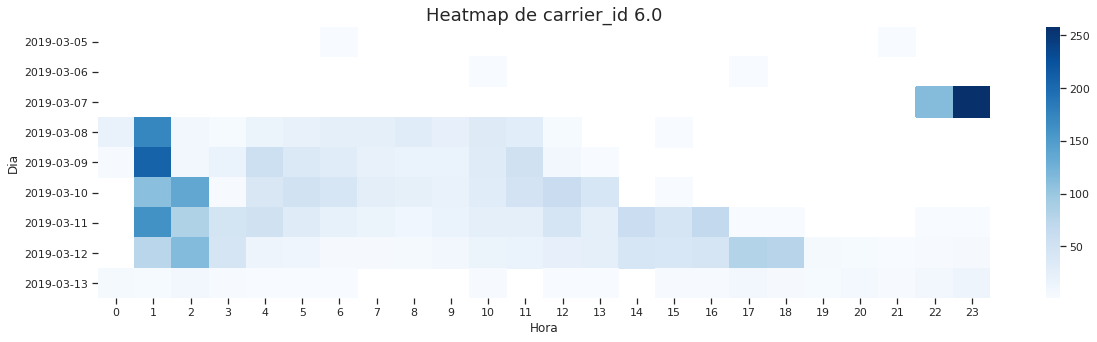

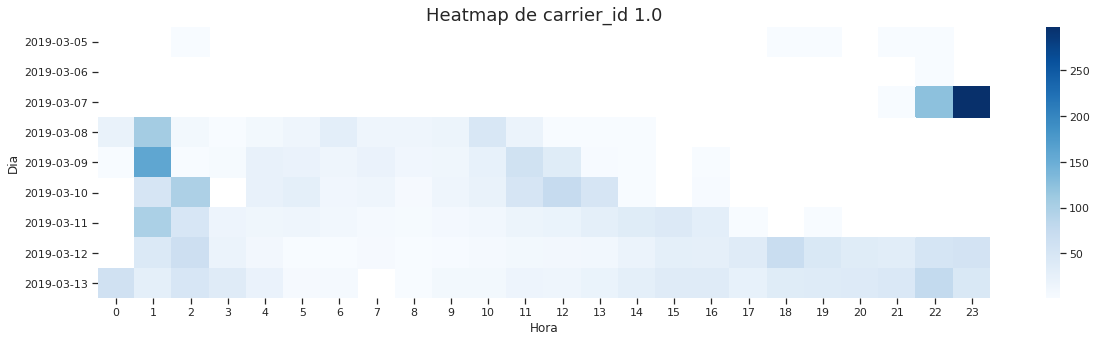

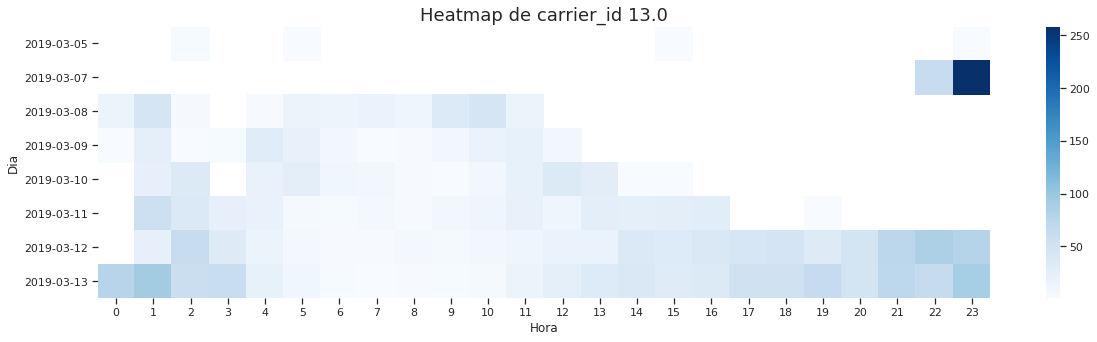

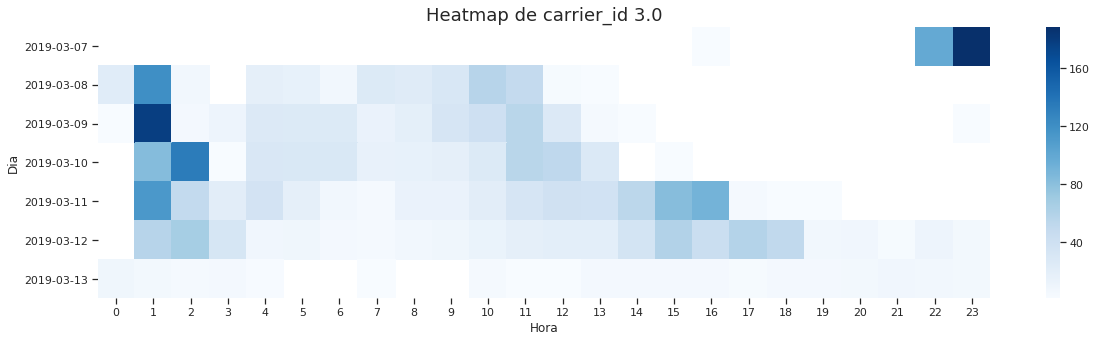

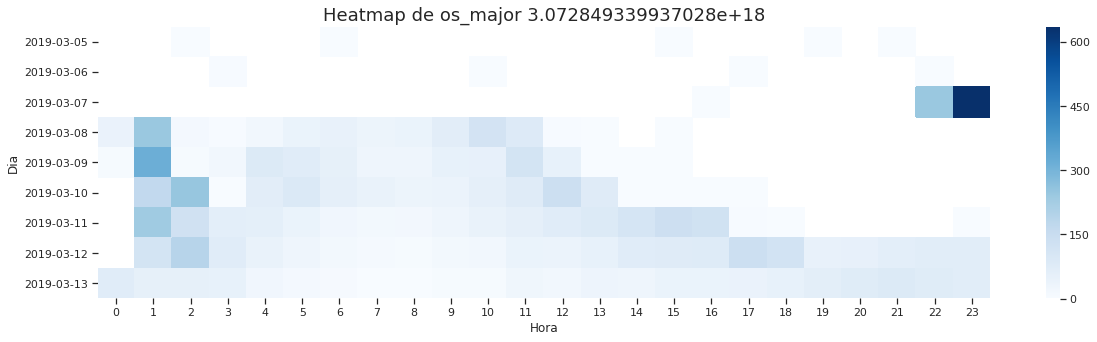

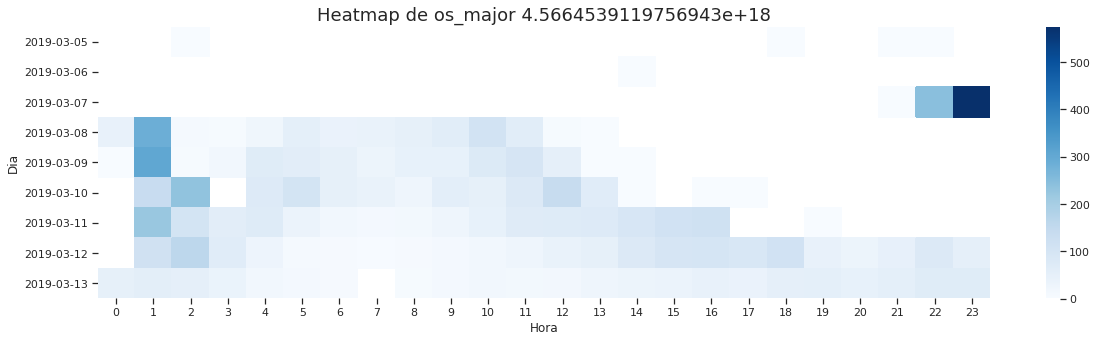

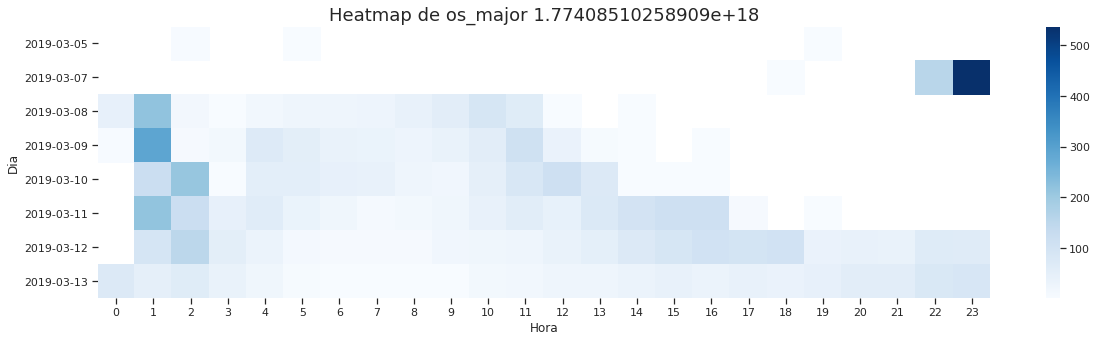

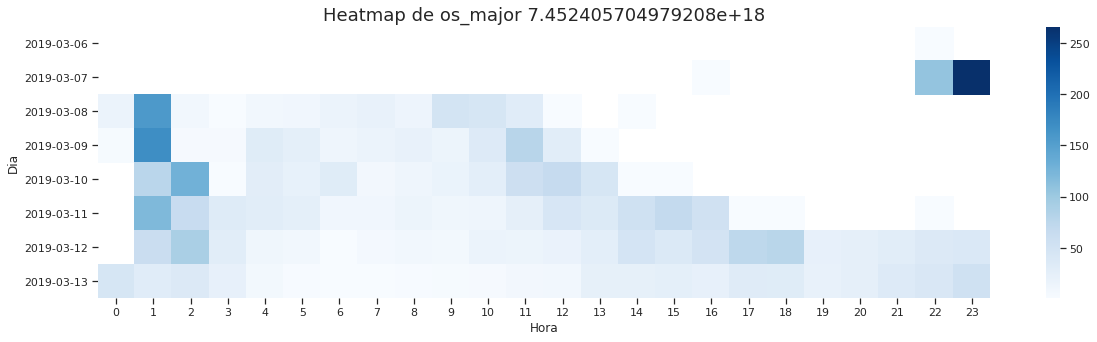

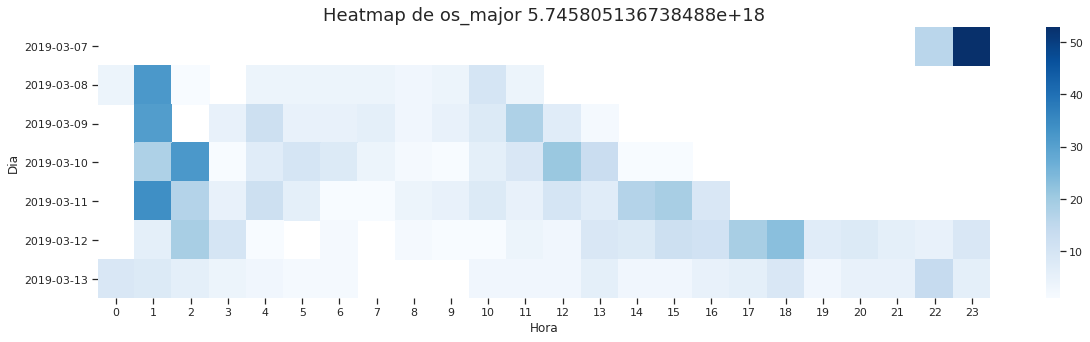

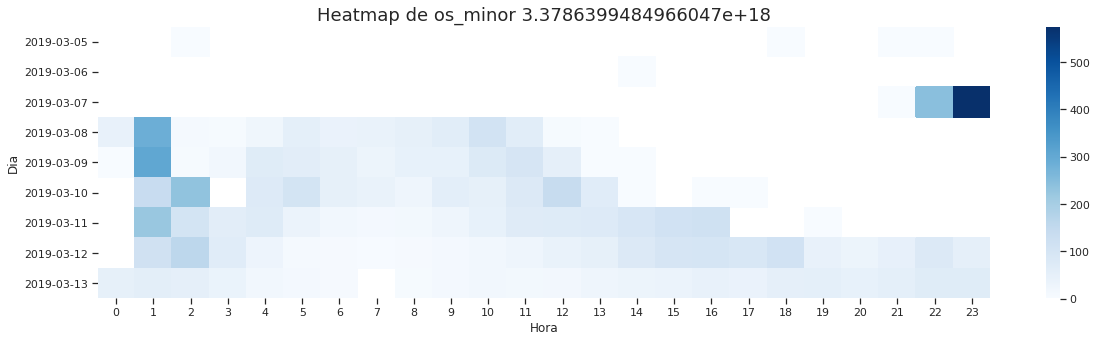

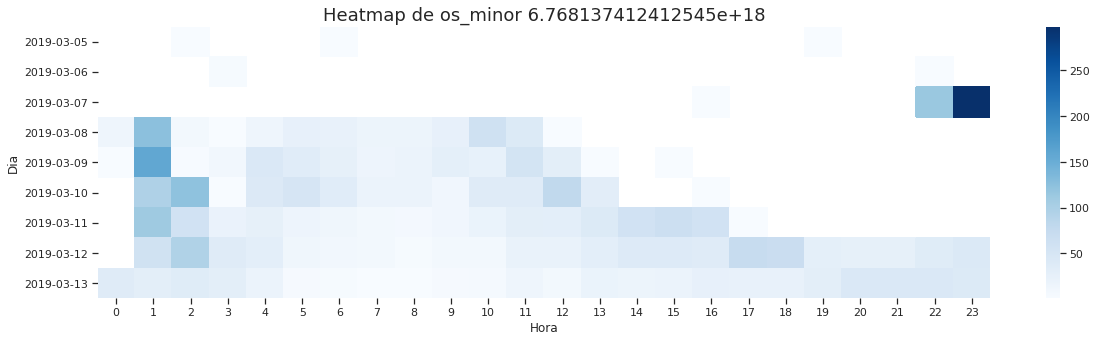

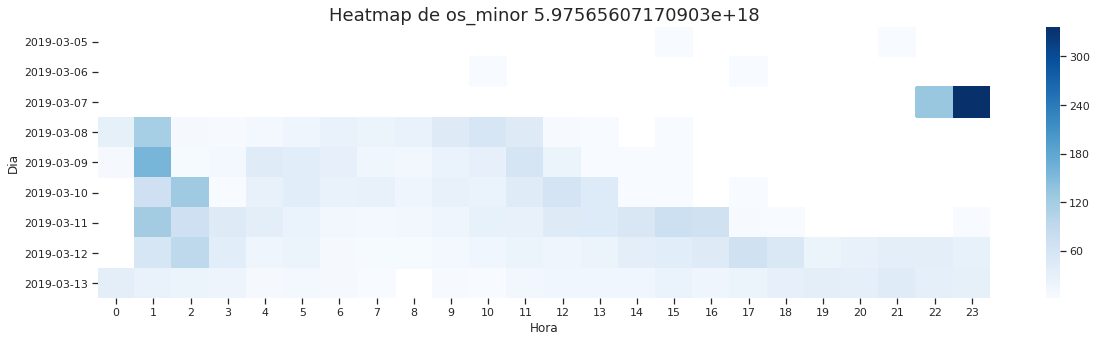

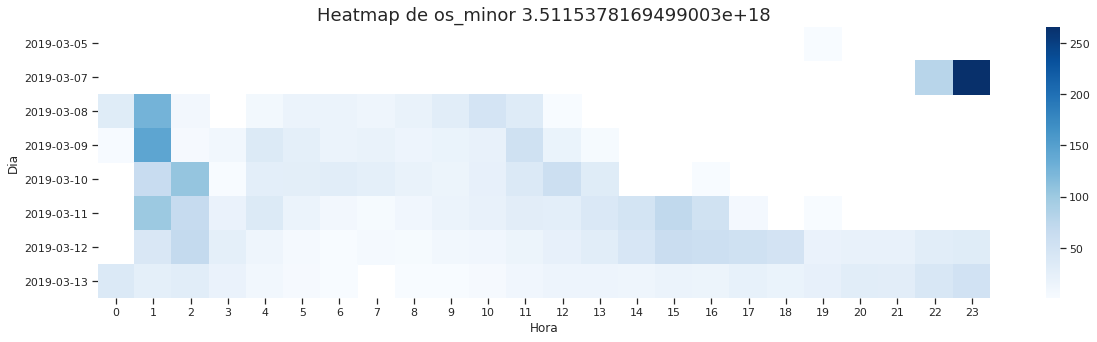

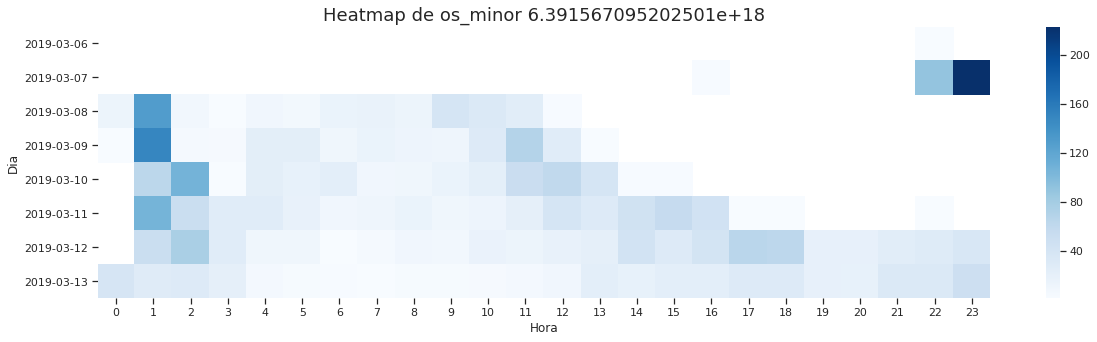

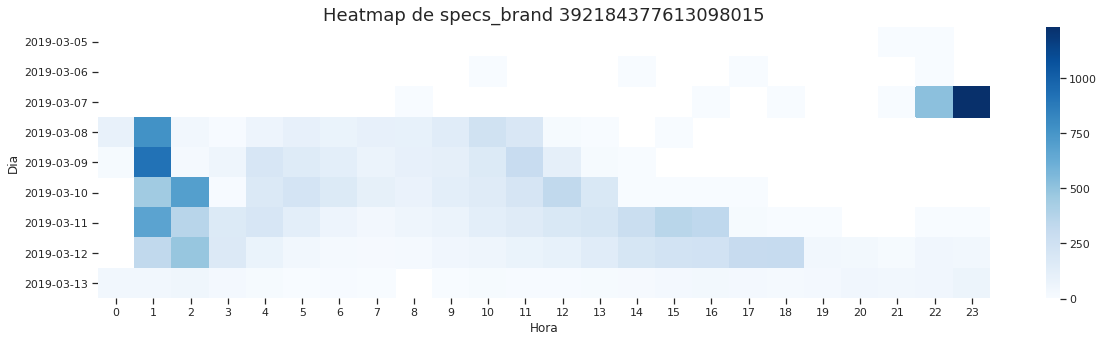

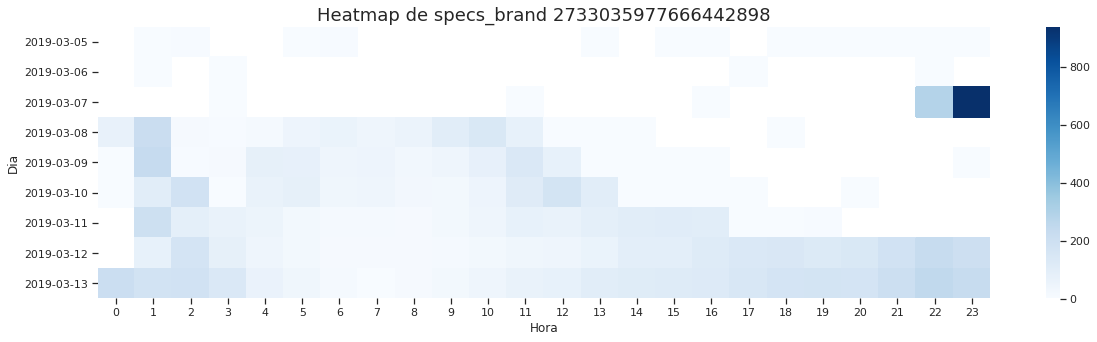

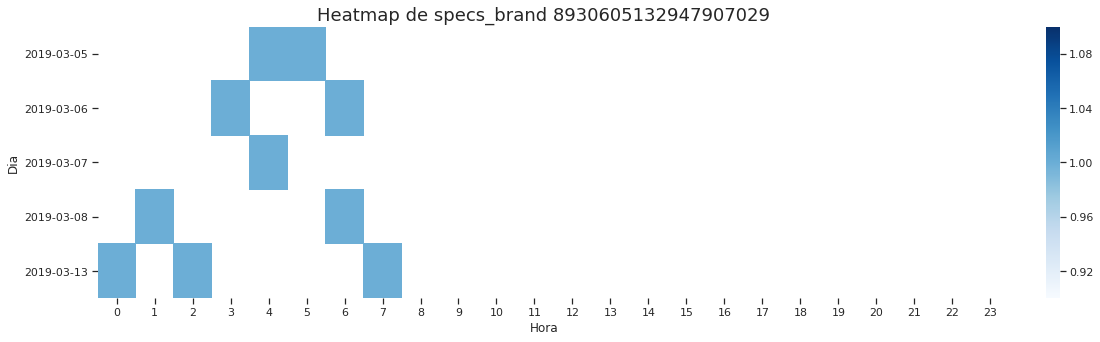

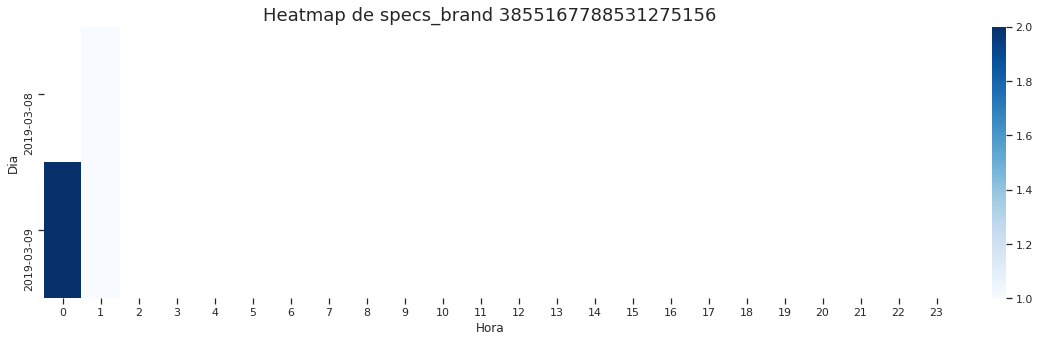

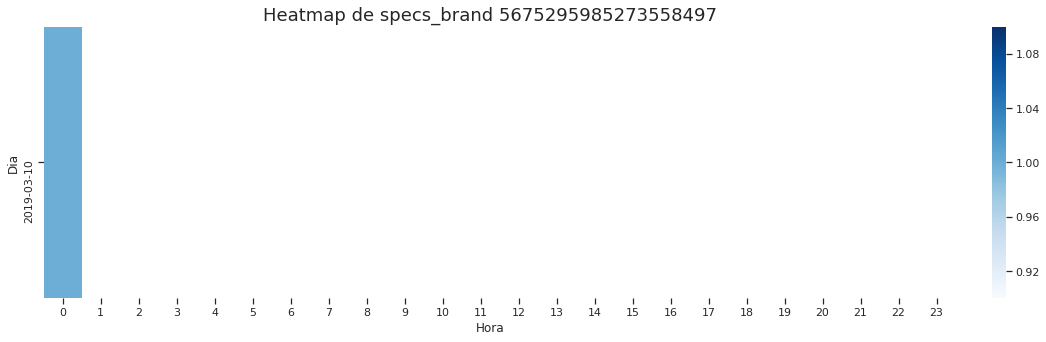

In [23]:
for i in top5.keys():
    for j in top5[i]:
        if i != 'day' and i != 'hour':
            matriz = clicks.loc[clicks[i]==j][['day','hour', 'ocurrencias']].groupby(['day','hour']).count().unstack()
            fig, ax = plt.subplots(figsize=(20,5))
            plt.title('Heatmap de ' + str(i) + ' ' + str(j), fontsize = 18)
            ax.set_xticks([])
            ax.set_yticks([])
            etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
            sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax);
            ax.set_ylabel("Dia",fontsize=12)
            ax.set_xlabel("Hora",fontsize=12)
            plt.savefig('clicks/heatmap_' + str(i) + '_' + str(j) +'.png', bbox_inches = 'tight')

## Realizamos un PairGrid
#### No es valido porque si hacemos el dropna (necesario para que no haya errores de ejecucion), eliminamos 90% de los datos

In [24]:
print(len(clicks))
print(len(clicks[grupos].dropna()))

26351
2607


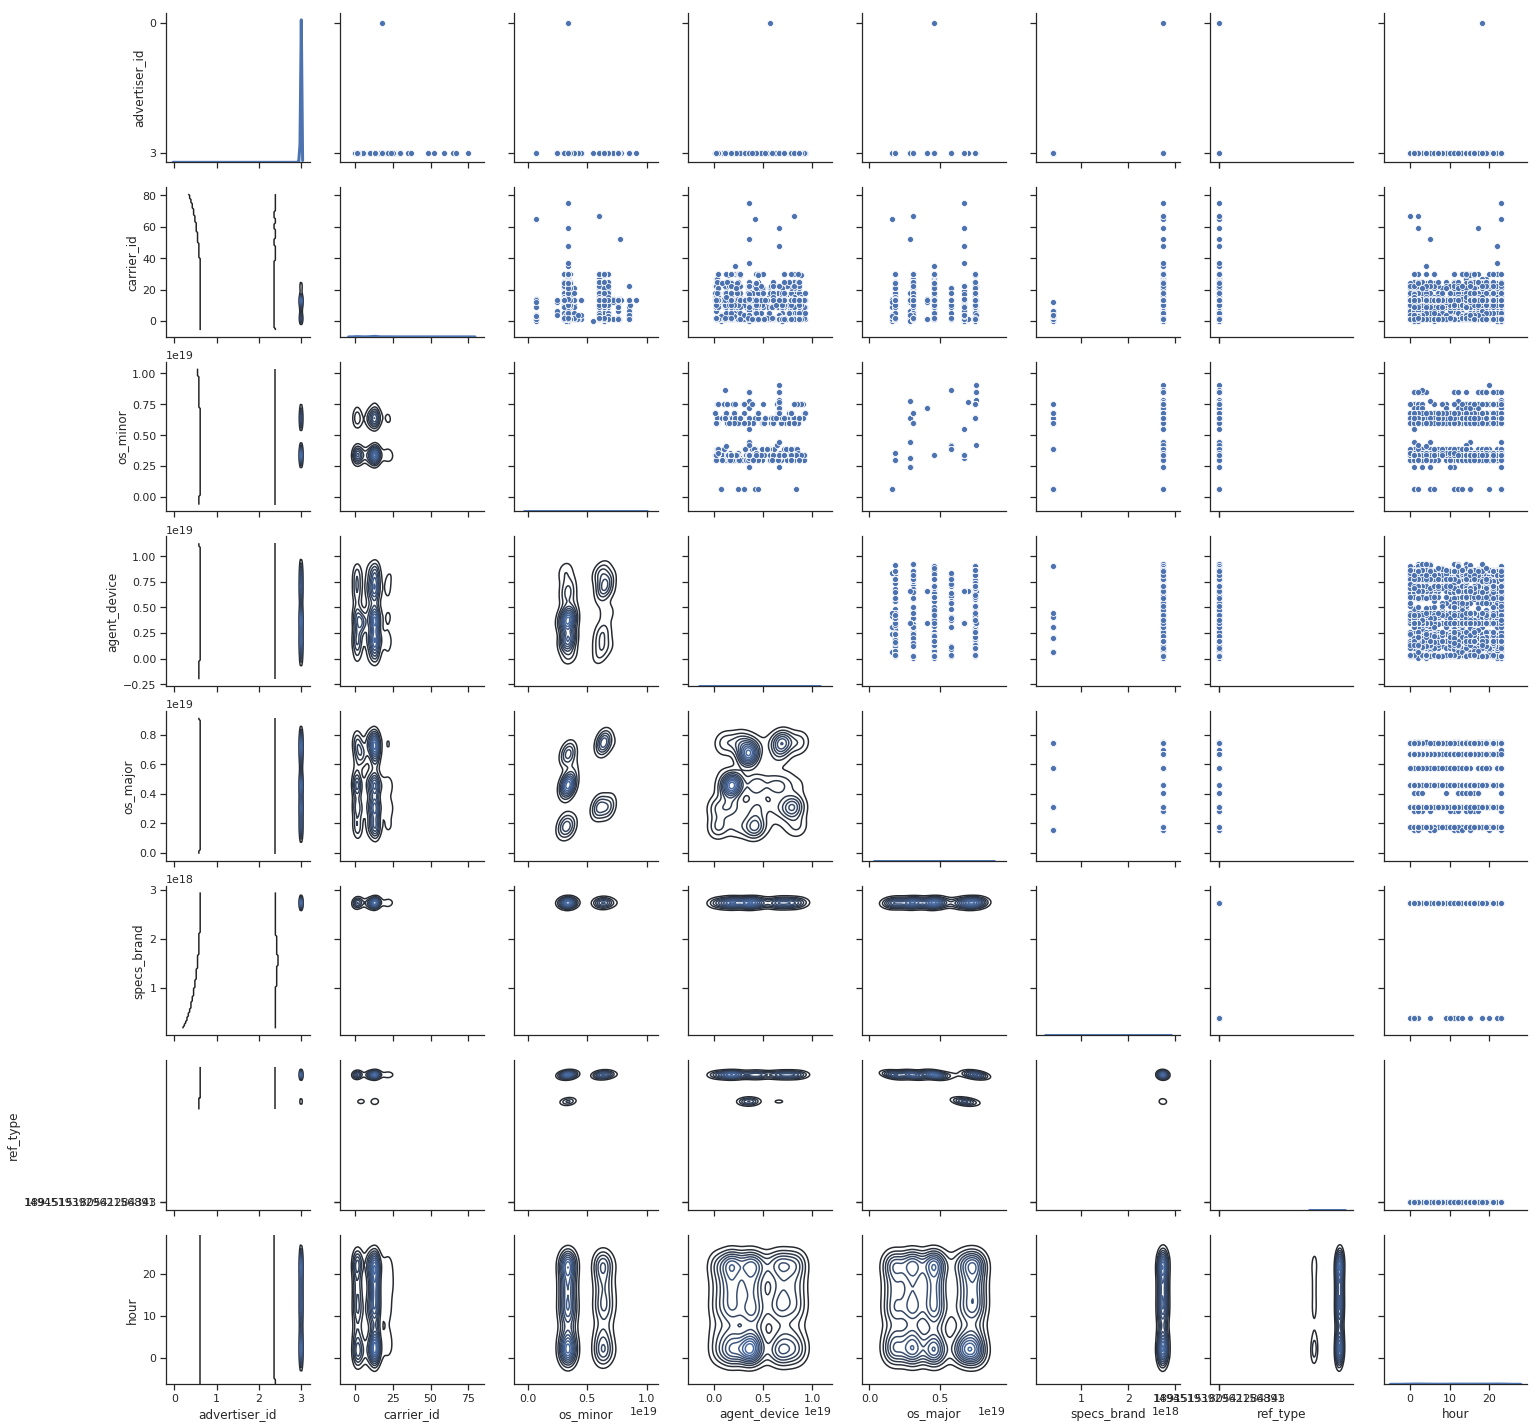

In [25]:
g = sns.PairGrid(data = clicks[grupos].dropna())
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)